# Data Science
## Mahla Entezari
---
# Assignment 2
---

# Practical Questions: YouTube Videos Analysis

## Data Preprocessing

In [252]:
import pandas as pd
import json
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [253]:
# os.environ['KAGGLE_USERNAME'] = 'USERNAME'
# os.environ['KAGGLE_KEY'] = 'API-KEY'


In [254]:
# !kaggle datasets download -d datasnaek/youtube-new --unzip

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.


 Now includes data from RU, MX, KR, JP and IN regions (Russia, Mexico, South Korea, Japan and India respectively) over the same time period.


Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.


The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.



In [255]:
test = pd.read_csv('CAvideos.csv')
test.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [256]:
test = pd.read_json('CA_category_id.json')
test.head()

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...   
1  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...   
2  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...   
3  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...   
4  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"ld...  
1  {'kind': 'youtube#videoCategory', 'etag': '"ld...  
2  {'kind': 'youtube#videoCategory', 'etag': '"ld...  
3  {'kind': 'youtube#videoCategory', 'etag': '"ld...  
4  {'kind': 'youtube#videoCategory', 'etag': '"ld...

In [257]:
with open('CA_category_id.json', 'r') as f:
    data = json.load(f)

test = pd.json_normalize(data['items'])

test.head()


kind                                               etag  \
0  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...   
1  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...   
2  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...   
3  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...   
4  youtube#videoCategory  "ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...   

   id         snippet.channelId     snippet.title  snippet.assignable  
0   1  UCBR8-60-B28hp2BmDPdntcQ  Film & Animation                True  
1   2  UCBR8-60-B28hp2BmDPdntcQ  Autos & Vehicles                True  
2  10  UCBR8-60-B28hp2BmDPdntcQ             Music                True  
3  15  UCBR8-60-B28hp2BmDPdntcQ    Pets & Animals                True  
4  17  UCBR8-60-B28hp2BmDPdntcQ            Sports                True

In [258]:
json_dir = '/content/'
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

dfs = []

for file in json_files:
    file_path = os.path.join(json_dir, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        if 'items' in data:
            df = pd.json_normalize(data['items'])
            df['region'] = file[:2]
            dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

columns_of_interest = [
    'id',
    'kind',
    'etag',
    'snippet.channelId',
    'snippet.title',
    'snippet.assignable',
    'region'
]


final_json_df = combined_df[columns_of_interest].rename(columns={
    'snippet.channelId': 'channel_id',
    'snippet.title': 'category',
    'snippet.assignable': 'assignable'
})
print(final_json_df.shape)
final_json_df.head()

(311, 7)


id                   kind  \
0   1  youtube#videoCategory   
1   2  youtube#videoCategory   
2  10  youtube#videoCategory   
3  15  youtube#videoCategory   
4  17  youtube#videoCategory   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...   

                 channel_id          category  assignable region  
0  UCBR8-60-B28hp2BmDPdntcQ  Film & Animation        True     GB  
1  UCBR8-60-B28hp2BmDPdntcQ  Autos & Vehicles        True     GB  
2  UCBR8-60-B28hp2BmDPdntcQ             Music        True     GB  
3  UCBR8-60-B28hp2BmDPdntcQ    Pets & Animals        True     GB  
4  UCBR8-60-B28hp2BmDPdntcQ            Sports        True     GB

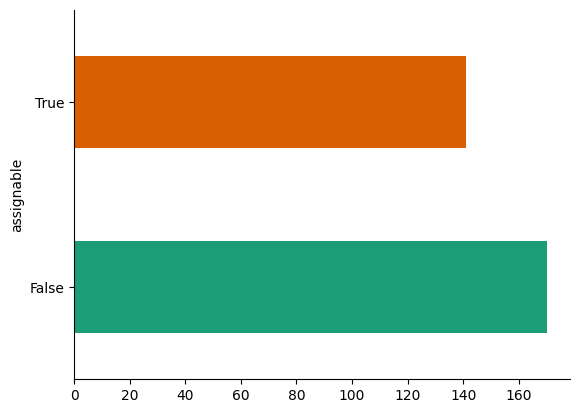

In [259]:
final_json_df.groupby('assignable').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

This horizontal bar chart visualizes the count of video categories by their assignable status:

True: These categories can be selected by users when uploading videos (e.g., "Music", "Gaming").

False: These are non-user-assignable categories, possibly internal or system-defined (e.g., placeholders, legacy groups).

There are more assignable categories than non-assignable ones, but not by a large margin.

Assignable categories dominate YouTube’s metadata, reflecting a user-facing taxonomy designed for classification and discoverability.

The presence of a sizable number of non-assignable categories suggests:

Some metadata is internal to YouTube or used for backend organization.

Not all categories shown in metadata are intended for creator-side use.

In [260]:
csv_dir = '/content/'
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

csv_dfs = []

for file in csv_files:
    path = os.path.join(csv_dir, file)
    df = pd.read_csv(path, encoding='ISO-8859-1')
    df['region'] = file[:2]
    csv_dfs.append(df)

final_csv_df = pd.concat(csv_dfs, ignore_index=True)

print(final_csv_df.shape)
final_csv_df.head()


(375942, 17)


video_id trending_date  \
0  gDuslQ9avLc      17.14.11   
1  AOCJIFEA_jE      17.14.11   
2  VAWNQDgwwOM      17.14.11   
3  gknkFwKQfHg      17.14.11   
4  3sYvZcwzZr8      17.14.11   

                                               title       channel_title  \
0  ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...  Ð¢âÐ ÐÐÐÐÐ§   
1  ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...        Druzhko Show   
2  Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...            Ð®Ð»Ð¸Ðº   
3  Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹            Hochland   
4  ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...    Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½   

   category_id              publish_time  \
0           22  2017-11-13T09:09:31.000Z   
1           22  2017-11-13T17:32:11.000Z   
2           24  2017-11-13T16:11:31.000Z   
3           22  2017-11-13T06:51:10.000Z   
4           24  2017-11-13T16:52:36.000Z   

                                                tags   views  likes  dislikes  \
0  Ð·Ð°Ñ
Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|"ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...   62408    334       190   
1  Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|"Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½"|...  330043  43841      2244   
2  ÑÐ¼Ð¾Ñ|"ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ"|"Ð²Ð»Ð¾Ð³"|"Ð±Ð»Ð¾Ð³...  424596  49854       714   
3  Ñ
Ð¾Ñ
Ð»Ð°Ð½Ð´|"ÑÑÑ"|"ÑÐµÑÐµÐ¿ÑÑ"|"ÐºÐ°...  112851   3566       122   
4  Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|"Sovergon"|"ÐºÐ»Ð¸Ð¿Ñ"|"ÑÐ¾...  243469  36216       631   

   comment_count                                  thumbnail_link  \
0             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2           2944  https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg   
3             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
4           1692  https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description region  
0  ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ
Ð°Ñ Ð¸ Ð...     RU  
1  Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...     RU  
2  http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...     RU  
3  *** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...     RU  
4  â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...     RU

In [261]:
final_csv_df.info()
final_csv_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

video_id trending_date  \
count    375942        375942   
unique   184287           205   
top      #NAME?      18.08.02   
freq       2312          1965   
mean        NaN           NaN   
std         NaN           NaN   
min         NaN           NaN   
25%         NaN           NaN   
50%         NaN           NaN   
75%         NaN           NaN   
max         NaN           NaN   

                                                    title  \
count                                              375942   
unique                                             186272   
top     Mission: Impossible - Fallout (2018) - Officia...   
freq                                                  100   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                             channel_title    category_id  \
count                               375942  375942.000000   
unique                               37824            NaN   
top     The Late Show with Stephen Colbert            NaN   
freq                                   984            NaN   
mean                                   NaN      20.232302   
std                                    NaN       7.132413   
min                                    NaN       1.000000   
25%                                    NaN      17.000000   
50%                                    NaN      23.000000   
75%                                    NaN      24.000000   
max                                    NaN      44.000000   

                    publish_time    tags         views         likes  \
count                     375942  375942  3.759420e+05  3.759420e+05   
unique                    169286  142211           NaN           NaN   
top     2018-05-18T14:00:04.000Z  [none]           NaN           NaN   
freq                          92   37698           NaN           NaN   
mean                         NaN     NaN  1.326568e+06  3.788431e+04   
std                          NaN     NaN  7.098568e+06  1.654131e+05   
min                          NaN     NaN  1.170000e+02  0.000000e+00   
25%                          NaN     NaN  4.697800e+04  6.690000e+02   
50%                          NaN     NaN  1.773705e+05  3.446000e+03   
75%                          NaN     NaN  6.476792e+05  1.747650e+04   
max                          NaN     NaN  4.245389e+08  5.613827e+06   

            dislikes  comment_count  \
count   3.759420e+05   3.759420e+05   
unique           NaN            NaN   
top              NaN            NaN   
freq             NaN            NaN   
mean    2.126107e+03   4.253775e+03   
std     2.248437e+04   2.545876e+04   
min     0.000000e+00   0.000000e+00   
25%     4.100000e+01   1.090000e+02   
50%     1.790000e+02   5.110000e+02   
75%     7.490000e+02   2.011000e+03   
max     1.944971e+06   1.626501e+06   

                                        thumbnail_link comments_disabled  \
count                                           375942            375942   
unique                                          185690                 2   
top     https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg             False   
freq                                                92            367479   
mean                                               NaN               NaN   
std                                                NaN               NaN   
min                                                NaN               NaN   
25%                                                NaN               NaN   
50%                                                NaN               NaN   
75%                                               

In [262]:
final_json_df.isnull().sum()

id            0
kind          0
etag          0
channel_id    0
category      0
assignable    0
region        0
dtype: int64

In [263]:
final_csv_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
region                        0
dtype: int64

In [264]:
final_csv_df['category_id'] = final_csv_df['category_id'].astype(str)
final_json_df['id'] = final_json_df['id'].astype(str)

merged_df = pd.merge(final_csv_df, final_json_df, left_on=['category_id', 'region'], right_on=['id', 'region'], how='left')
merged_df.head()

video_id trending_date  \
0  gDuslQ9avLc      17.14.11   
1  AOCJIFEA_jE      17.14.11   
2  VAWNQDgwwOM      17.14.11   
3  gknkFwKQfHg      17.14.11   
4  3sYvZcwzZr8      17.14.11   

                                               title       channel_title  \
0  ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...  Ð¢âÐ ÐÐÐÐÐ§   
1  ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...        Druzhko Show   
2  Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...            Ð®Ð»Ð¸Ðº   
3  Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹            Hochland   
4  ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...    Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½   

  category_id              publish_time  \
0          22  2017-11-13T09:09:31.000Z   
1          22  2017-11-13T17:32:11.000Z   
2          24  2017-11-13T16:11:31.000Z   
3          22  2017-11-13T06:51:10.000Z   
4          24  2017-11-13T16:52:36.000Z   

                                                tags   views  likes  dislikes  \
0  Ð·Ð°Ñ
Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|"ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...   62408    334       190   
1  Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|"Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½"|...  330043  43841      2244   
2  ÑÐ¼Ð¾Ñ|"ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ"|"Ð²Ð»Ð¾Ð³"|"Ð±Ð»Ð¾Ð³...  424596  49854       714   
3  Ñ
Ð¾Ñ
Ð»Ð°Ð½Ð´|"ÑÑÑ"|"ÑÐµÑÐµÐ¿ÑÑ"|"ÐºÐ°...  112851   3566       122   
4  Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|"Sovergon"|"ÐºÐ»Ð¸Ð¿Ñ"|"ÑÐ¾...  243469  36216       631   

   ...  ratings_disabled video_error_or_removed  \
0  ...             False                  False   
1  ...             False                  False   
2  ...             False                  False   
3  ...             False                  False   
4  ...             False                  False   

                                         description  region  id  \
0  ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ
Ð°Ñ Ð¸ Ð...      RU  22   
1  Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...      RU  22   
2  http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...      RU  24   
3  *** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...      RU  22   
4  â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...      RU  24   

                    kind                                               etag  \
0  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
1  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
2  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
3  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
4  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   

                 channel_id        category assignable  
0  UCBR8-60-B28hp2BmDPdntcQ  People & Blogs       True  
1  UCBR8-60-B28hp2BmDPdntcQ  People & Blogs       True  
2  UCBR8-60-B28hp2BmDPdntcQ   Entertainment       True  
3  UCBR8-60-B28hp2BmDPdntcQ  People & Blogs       True  
4  UCBR8-60-B28hp2BmDPdntcQ   Entertainment       True  

[5 rows x 23 columns]

In [265]:
merged_df.describe()

views         likes      dislikes  comment_count
count  3.759420e+05  3.759420e+05  3.759420e+05   3.759420e+05
mean   1.326568e+06  3.788431e+04  2.126107e+03   4.253775e+03
std    7.098568e+06  1.654131e+05  2.248437e+04   2.545876e+04
min    1.170000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    4.697800e+04  6.690000e+02  4.100000e+01   1.090000e+02
50%    1.773705e+05  3.446000e+03  1.790000e+02   5.110000e+02
75%    6.476792e+05  1.747650e+04  7.490000e+02   2.011000e+03
max    4.245389e+08  5.613827e+06  1.944971e+06   1.626501e+06

In [266]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  object
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [267]:
merged_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
region                        0
id                         2738
kind                       2738
etag                       2738
channel_id                 2738
category                   2738
assignable                 2738
dtype: int64

In [268]:
merged_df.fillna('Unknown', inplace=True)

merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], format='%y.%d.%m', errors='coerce')
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time'], errors='coerce')

merged_df['publish_date'] = merged_df['publish_time'].dt.date
merged_df['publish_hour'] = merged_df['publish_time'].dt.hour
merged_df['publish_day'] = merged_df['publish_time'].dt.day_name()

merged_df['tag_count'] = merged_df['tags'].apply(lambda x: 0 if x == '[none]' else len(x.split('|')))


merged_df.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True)


In [269]:
merged_df.head()

video_id trending_date  \
0  gDuslQ9avLc    2017-11-14   
1  AOCJIFEA_jE    2017-11-14   
2  VAWNQDgwwOM    2017-11-14   
3  gknkFwKQfHg    2017-11-14   
4  3sYvZcwzZr8    2017-11-14   

                                               title       channel_title  \
0  ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...  Ð¢âÐ ÐÐÐÐÐ§   
1  ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...        Druzhko Show   
2  Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...            Ð®Ð»Ð¸Ðº   
3  Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹            Hochland   
4  ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...    Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½   

  category_id              publish_time  \
0          22 2017-11-13 09:09:31+00:00   
1          22 2017-11-13 17:32:11+00:00   
2          24 2017-11-13 16:11:31+00:00   
3          22 2017-11-13 06:51:10+00:00   
4          24 2017-11-13 16:52:36+00:00   

                                                tags   views  likes  dislikes  \
0  Ð·Ð°Ñ
Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|"ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...   62408    334       190   
1  Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|"Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½"|...  330043  43841      2244   
2  ÑÐ¼Ð¾Ñ|"ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ"|"Ð²Ð»Ð¾Ð³"|"Ð±Ð»Ð¾Ð³...  424596  49854       714   
3  Ñ
Ð¾Ñ
Ð»Ð°Ð½Ð´|"ÑÑÑ"|"ÑÐµÑÐµÐ¿ÑÑ"|"ÐºÐ°...  112851   3566       122   
4  Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|"Sovergon"|"ÐºÐ»Ð¸Ð¿Ñ"|"ÑÐ¾...  243469  36216       631   

   ...  id                   kind  \
0  ...  22  youtube#videoCategory   
1  ...  22  youtube#videoCategory   
2  ...  24  youtube#videoCategory   
3  ...  22  youtube#videoCategory   
4  ...  24  youtube#videoCategory   

                                                etag  \
0  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
1  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
2  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
3  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
4  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   

                 channel_id        category assignable publish_date  \
0  UCBR8-60-B28hp2BmDPdntcQ  People & Blogs       True   2017-11-13   
1  UCBR8-60-B28hp2BmDPdntcQ  People & Blogs       True   2017-11-13   
2  UCBR8-60-B28hp2BmDPdntcQ   Entertainment       True   2017-11-13   
3  UCBR8-60-B28hp2BmDPdntcQ  People & Blogs       True   2017-11-13   
4  UCBR8-60-B28hp2BmDPdntcQ   Entertainment       True   2017-11-13   

  publish_hour publish_day tag_count  
0            9      Monday        14  
1           17      Monday        16  
2           16      Monday        14  
3            6      Monday         6  
4           16      Monday        33  

[5 rows x 27 columns]

In [270]:
merged_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'region', 'id', 'kind', 'etag',
       'channel_id', 'category', 'assignable', 'publish_date', 'publish_hour',
       'publish_day', 'tag_count'],
      dtype='object')

In [271]:
import re

def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', str(text))
    text = text.lower()
    return text

def split_tags(tag_str):
    if tag_str.lower() == "[none]":
        return []
    return tag_str.split("|")

merged_df['title_clean'] = merged_df['title'].apply(clean_text)
merged_df['tags_list'] = merged_df['tags'].apply(split_tags)


In [272]:
merged_df.shape

(323730, 29)

In [273]:
merged_df.sample(n=5, random_state=42)

video_id trending_date  \
374247  GoOm7GivEL8    2018-06-05   
92138   yf327kvltwI    2018-05-10   
365713  fm2GlhMyk8A    2018-04-16   
187311  LVT-cOfbHjo    2017-12-18   
123598  ZCPwpcurYns    2018-03-21   

                                                    title      channel_title  \
374247  í­ì¤ë´ì¤/ê¹ì ì, ë¯¸êµ­ì êµ´ë³µíì§...       ê¹íì¬ TV   
92138   Kaala (Tamil) - Official Jukebox | Rajinikanth...  Wunderbar Studios   
365713            íì¤ë£°ì´ ë¶ë¥¸ ì°¸ì¬ë¤ ëë²ì§¸  tvìê¸´ì¬ì´ë¤   
187311                               LE BAC VA CHANGER !!            Mathrix   
123598                             How To Make Mumble Rap           nigahiga   

       category_id              publish_time  \
374247          25 2018-06-04 12:57:14+00:00   
92138           10 2018-05-09 03:42:32+00:00   
365713          23 2018-04-13 11:26:22+00:00   
187311          27 2017-12-17 15:58:38+00:00   
123598          24 2018-03-17 20:58:36+00:00   

                                                     tags    views   likes  \
374247  ê¹íì¬|"TV"|"ì 3ì°¨ ì¸ê³ëì "|"3ì°¨ ë...    23528    2206   
92138   Wunderbar Studios|"Wunderbar Films"|"Dhanush"|...   833179   18872   
365713                                             [none]   706671    1270   
187311  bac"|"le bac"|"baccalaurÃ©at"|"changement bac"...     8643     673   
123598  ryan|"higa"|"higatv"|"nigahiga"|"david choi"|"...  4697844  301355   

        dislikes  ...                                               etag  \
374247        10  ...  "XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...   
92138       2635  ...  "XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...   
365713       774  ...  "XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...   
187311        16  ...  "ld9biNPKjAjgjV7EZ4EKeEGrhao/EoYkczo9I3RCf96Rv...   
123598      4946  ...  "m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...   

                      channel_id         category  assignable  publish_date  \
374247  UCBR8-60-B28hp2BmDPdntcQ  News & Politics        True    2018-06-04   
92138   UCBR8-60-B28hp2BmDPdntcQ            Music        True    2018-05-09   
365713  UCBR8-60-B28hp2BmDPdntcQ           Comedy        True    2018-04-13   
187311  UCBR8-60-B28hp2BmDPdntcQ        Education        True    2017-12-17   
123598  UCBR8-60-B28hp2BmDPdntcQ    Entertainment        True    2018-03-17   

       publish_hour publish_day tag_count  \
374247           12      Monday        21   
92138             3   Wednesday        26   
365713           11      Friday         0   
187311           15      Sunday        16   
123598           20    Saturday         9   

                                              title_clean  \
374247                             3   world war 3 threat   
92138   kaala tamil  official jukebox  rajinikanth  pa...   
365713                                                      
187311                                 le bac va changer    
123598                             how to make mumble rap   

                                                tags_list  
374247  [ê¹íì¬, "TV", "ì 3ì°¨ ì¸ê³ëì ", "3ì°...  
92138   [Wunderbar Studios, "Wunderbar Films", "Dhanus...  
365713                                                 []  
187311  [bac", "le bac", "baccalaurÃ©at", "changement ...  
123598  [ryan, "higa", "higatv", "nigahiga", "david ch...  

[5 rows x 29 columns]

In [274]:
merged_df = merged_df.sort_values(by='region', ascending=False)

cols = ['region'] + [col for col in merged_df.columns if col != 'region']
merged_df = merged_df[cols]

merged_df

region     video_id trending_date  \
114460     US  uBUnmdd5-iA    2018-02-03   
125825     US  bEWLOo12UAU    2018-04-01   
125818     US  YZ1UN5gvLjQ    2018-04-01   
125819     US  EZXu7RxBR0Y    2018-04-01   
125820     US  S9KxqRUcnCU    2018-04-01   
...       ...          ...           ...   
324293     CA  If2lCD0SQrE    2018-03-15   
324294     CA  7vracgLyJwI    2018-03-15   
324296     CA  vUe1XsHtuoA    2018-03-15   
324298     CA  3ZfBZ8feNDk    2018-03-15   
340483     CA  l9uLma9WjmU    2018-06-10   

                                                    title  \
114460            Mr. Bean Is A Master Of Physical Comedy   
125825            Picking the 2018 XXL Freshman 10th Spot   
125818  Marvel Studios' Avengers: Infinity War - All o...   
125819  Pageant Queens Answer Commonly Googled Questio...   
125820               Boomerang Trick Shots | Dude Perfect   
...                                                   ...   
324293     Adrift Trailer #1 (2018) | Movieclips Trailers   
324294  October | Official Trailer | Varun Dhawan | Ba...   
324296      Dyslexic McDonald's Worker Sets Sign to Wumbo   
324298                              Louis Le Prince - Q+A   
340483            Women Try Amazon Prom Dresses Under $50   

               channel_title category_id              publish_time  \
114460           Nerdwriter1          24 2018-01-31 21:16:01+00:00   
125825               fantano          10 2018-03-27 20:00:10+00:00   
125818  Marvel Entertainment          24 2018-03-27 19:00:07+00:00   
125819         BuzzFeedVideo          22 2018-03-28 21:00:19+00:00   
125820          Dude Perfect          17 2018-03-26 22:01:01+00:00   
...                      ...         ...                       ...   
324293   Movieclips Trailers           1 2018-03-14 14:30:00+00:00   
324294          Risingsunrsf          24 2018-03-12 07:13:09+00:00   
324296         Triggered Tro          25 2018-03-12 23:12:00+00:00   
324298          BuzzFeedBlue          22 2018-03-14 22:00:16+00:00   
340483                 As/Is          22 2018-06-09 18:00:50+00:00   

                                                     tags     views   likes  \
114460  the nerdwriter|"nerdwriter"|"nerdwriter youtub...    521923   33214   
125825  hip hop|"xxl"|"freshman"|"2018"|"cover"|"ski m...    220670    5504   
125818  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   2510676   93985   
125819  BuzzFeed|"BuzzFeedVideo"|"BuzzFeed Video"|"Vid...    367974    6283   
125820  dude perfect|"dude perfect stereotypes"|"dude ...  19802960  793093   
...                                                   ...       ...     ...   
324293  Adrift|"Adrift Trailer"|"Adrift Movie Trailer"...    212888    5241   
324294  October Official Trailer|"October"|"October Tr...  18501488  175438   
324296  dr phil|"dr"|"phil"|"youtuber"|"tv"|"danielle"...    472542   41124   
324298  Buzzfeed unsolved|"BuzzFeed"|"unsolved"|"myste...    264720   13705   
340483  BuzzFeed|"BuzzFeedAs/Is"|"Dresses"|"Prom"|"Pro...    268479    6594   

        ...                                               etag  \
114460  ...  "m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...   
125825  ...  "m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...   
125818  ...  "m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...   
125819  ...  "m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...   
125820  ...  "m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...   
...     ...                                                ...   
324293  ...  "ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...   
324294  ...  "ld9biNPKjAjgjV7EZ4EKeEGrhao/UVB9oxX2Bvqa_w_y3...   
324296  ...  "ld9biNPKjAjgjV7EZ4EKeEGrhao/QiLK0ZIrFoORdk_g2...   
324298  ...  "ld9biNPKjAjgjV7EZ4EKeEGrhao/xId8RX7vRN8rqkbYZ...   
340483  ...  "ld9biNPKjAjgjV7EZ4EKeEGrhao/xId8RX7vRN8rqkbYZ...   

                      channel_id          category  assignable  publish_date  \
114460  UCBR8-60-B28hp2BmDPdntcQ     Entertainment        True    2018-01-31   
12

## Visualizations

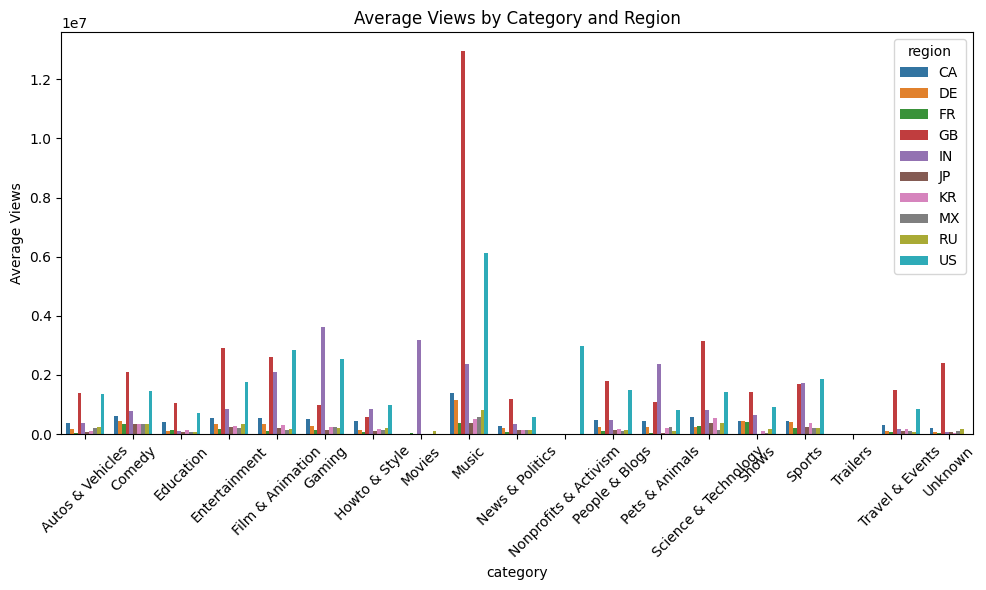

In [275]:
merged_df['like_ratio'] = merged_df['likes'] / (merged_df['likes'] + merged_df['dislikes'])

category_stats = merged_df.groupby(['category', 'region']).agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'like_ratio': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_stats, x='category', y='views', hue='region')
plt.title('Average Views by Category and Region')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This grouped bar chart compares the average view count across different content categories and regions (e.g., US, GB, IN, etc.).

---

1. Music Dominates
The Music category stands out massively across multiple regions.

In particular, Great Britain (GB) and the United States (US) show extreme spikes in average views — GB exceeding 12 million views, and US over 6 million.

This suggests music videos have strong global appeal and high replayability.

2. Regional Preferences Are Clear
India (IN) shows high engagement across Gaming, Entertainment, and Howto & Style.

Korea (KR) shows peaks in Gaming, Film & Animation, and Music.

Russia (RU) and France (FR) have generally lower average views across categories, possibly indicating more fragmented content consumption or fewer trending uploads.

3. Entertainment & Film
Categories like Entertainment, Film & Animation, and Gaming also show relatively high averages in several regions — particularly IN, KR, and US.

4. Low Engagement Categories
Categories such as Nonprofits & Activism, Pets & Animals, and Science & Technology show consistently lower average views across most regions, suggesting niche audiences or lower trending potential.

5. Cultural Variability
The diversity of spikes indicates regional cultural preferences. For instance:

News & Politics is more viewed in US and KR

People & Blogs peaks more in IN

Education has modest popularity across all regions but never spikes


---

To maximize reach globally, focus on Music, Gaming, and Entertainment.

If targeting specific regions:

GB/US: Prioritize Music and News

IN: Consider Gaming, People & Blogs, and Film

KR: Lean into Film & Animation, Music, and Gaming

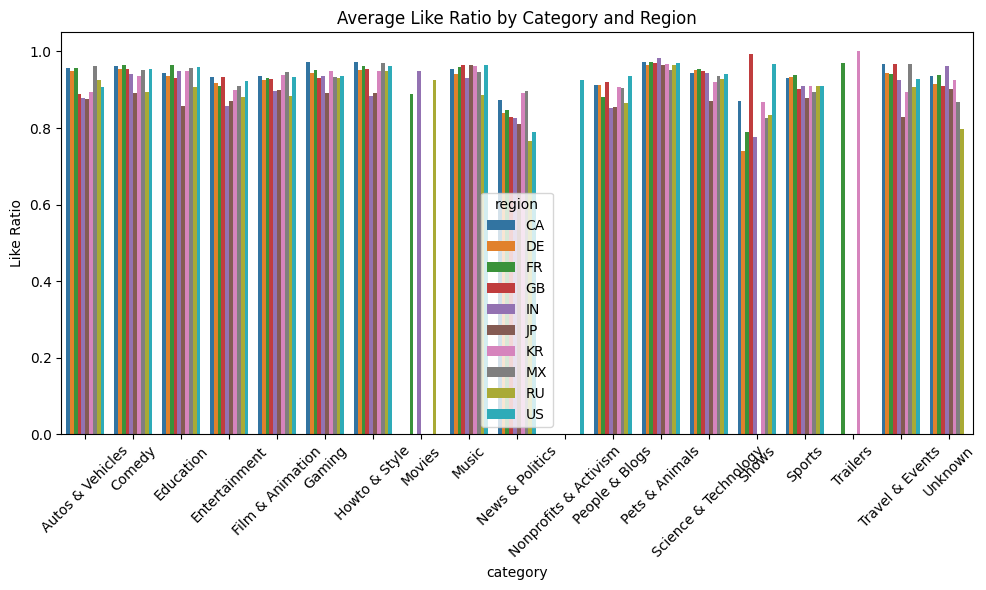

In [276]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_stats, x='category', y='like_ratio', hue='region')
plt.title('Average Like Ratio by Category and Region')
plt.ylabel('Like Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Like Ratio by Category and Region

This chart visualizes the **average like ratio** across different content categories, broken down by region. The like ratio is a measure of public approval.

A higher ratio indicates greater positivity and approval from viewers.

---


#### 1. High Like Ratios Across the Board
- Most categories, regardless of region, maintain a like ratio well above **0.90**.
- This suggests that **YouTube trending videos are overwhelmingly well-received**, likely due to their high quality or audience targeting.

#### 2. Cross-Regional Consistency
- Categories like **Education**, **Science & Technology**, **Howto & Style**, and **Pets & Animals** are **consistently appreciated** across all regions.
- These genres likely benefit from being helpful, informative, or wholesome, avoiding divisive reactions.

#### 3. Slightly Lower Ratios in Entertainment & Opinion-Based Categories
- **News & Politics**, **People & Blogs**, and **Comedy** occasionally show **lower average like ratios**, especially in **US**, **IN**, and **GB**.
- These categories may be **more prone to controversial or polarizing content**.

#### 4. Regional Trends
- **Korea (KR)** tends to show **higher like ratios** across most categories.
- **US and GB** tend to show more **variability**, especially in politicized or cultural content.

---

- **Educational and non-controversial content** not only trends but also garners **positive reception**.
- If you create content in **News or Opinion-based categories**, consider:
  - Stronger moderation,
  - Targeted audience engagement,
  - Neutral or inclusive framing to sustain high approval metrics.

---

In [277]:
top_channels = merged_df['channel_title'].value_counts().head(10)
top_channels

channel_title
The Late Show with Stephen Colbert        588
WWE                                       553
Late Night with Seth Meyers               506
CNN                                       483
TheEllenShow                              461
Jimmy Kimmel Live                         457
ESPN                                      447
The Tonight Show Starring Jimmy Fallon    432
SET India                                 389
The Late Late Show with James Corden      380
Name: count, dtype: int64

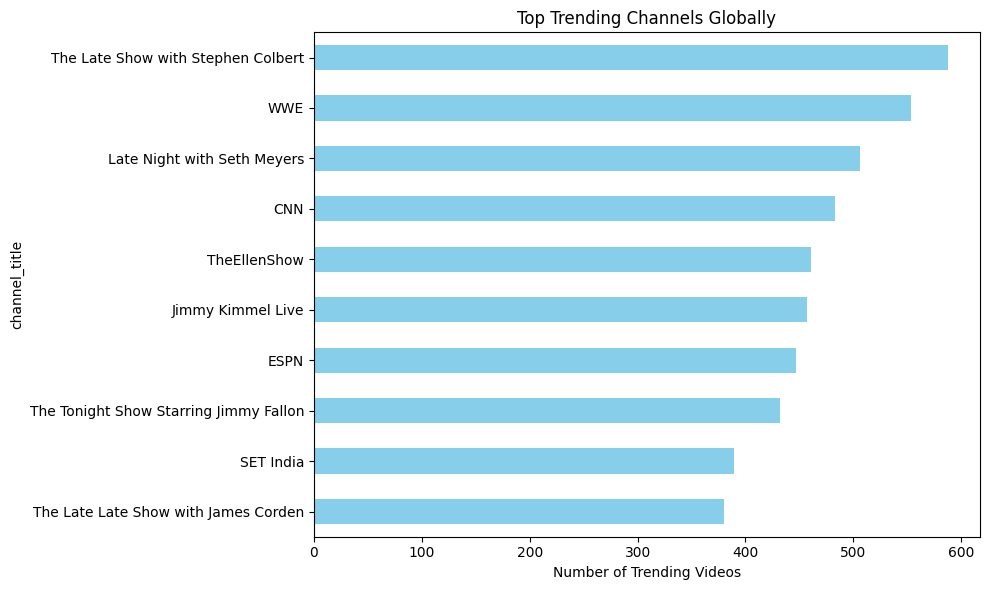

In [278]:
plt.figure(figsize=(10, 6))
top_channels.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top Trending Channels Globally')
plt.xlabel('Number of Trending Videos')
plt.tight_layout()
plt.show()

This horizontal bar chart displays the top 10 YouTube channels based on the number of appearances in the trending dataset. It reveals which creators consistently generate content that reaches wide visibility and engagement.

---


1. Late-Night Talk Shows Dominate
The Late Show with Stephen Colbert leads with nearly 600 trending appearances, followed closely by other talk show giants:

Seth Meyers

Jimmy Kimmel

James Corden

Jimmy Fallon

These results suggest a strong global appetite for recurring, topical, humor-driven content, especially from well-known brands and hosts.

2. WWE Holds a Strong 2nd Place
WWE ranks just behind Colbert, indicating its massive global following and consistent trend-worthy content.

Combines drama, athleticism, and entertainment — ideal for virality.

3. CNN Represents News Category
The only major news outlet in the top 10, reflecting both high content volume and viewer interest in real-time global issues.

Likely boosted during high-news cycles or major political events.

4. ESPN & TheEllenShow Show Strong Media Power
These networks consistently produce content that engages large audiences across sports and entertainment domains.

5. SET India — A Global Outlier
The only non-Western channel in the top 10, indicating:

India’s rising influence on YouTube’s global landscape

The strong regional loyalty and viewership scale of Indian audiences



In [279]:
top_channels_by_region = merged_df.groupby('region')['channel_title'].value_counts().groupby(level=0).nlargest(1).reset_index(level=0, drop=True)
top_channels_by_region

region  channel_title              
CA      The Young Turks                178
DE      Galileo                        200
FR      Troom Troom FR                 195
GB      WWE                            182
IN      etvteluguindia                 203
JP      DHCãã¬ã                    98
KR      ëë´ë°íê¸°                193
MX      Badabun                        182
RU      ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹ Ð¨Ð°ÑÐ¸Ð¹    195
US      ESPN                           202
Name: count, dtype: int64

In [280]:
top_categories = merged_df.groupby('category')['views'].mean().sort_values(ascending=False).head(10)
top_categories

category
Music                    5.906572e+06
Nonprofits & Activism    2.963884e+06
Movies                   1.536467e+06
Film & Animation         1.017151e+06
Science & Technology     8.627316e+05
Entertainment            7.527176e+05
Comedy                   7.152099e+05
Sports                   6.051827e+05
Gaming                   5.614888e+05
Howto & Style            4.423967e+05
Name: views, dtype: float64

In [281]:
top_categories_by_region = merged_df.groupby(['region', 'category'])['views'].mean().reset_index()
top_categories_by_region = top_categories_by_region.sort_values(['region', 'views'], ascending=[True, False])
top_categories_by_region

region              category         views
7       CA                 Music  1.377408e+06
1       CA                Comedy  6.131174e+05
11      CA  Science & Technology  5.942556e+05
3       CA         Entertainment  5.598398e+05
4       CA      Film & Animation  5.520190e+05
..     ...                   ...           ...
162     US                 Shows  9.035273e+05
164     US       Travel & Events  8.556125e+05
160     US        Pets & Animals  8.323771e+05
151     US             Education  7.106983e+05
157     US       News & Politics  5.907568e+05

[165 rows x 3 columns]

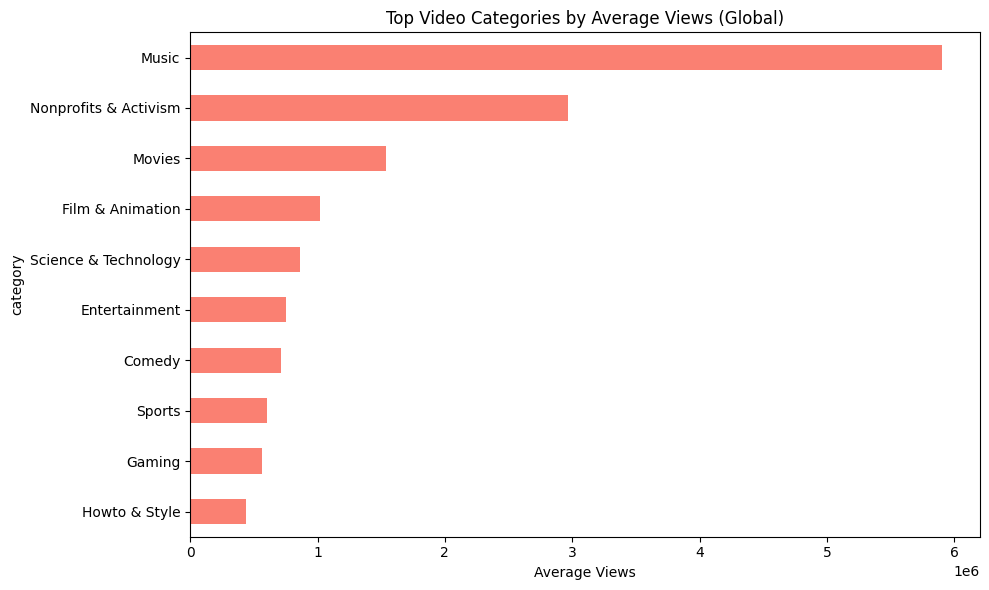

In [282]:
plt.figure(figsize=(10, 6))
top_categories.sort_values().plot(kind='barh', color='salmon')
plt.title('Top Video Categories by Average Views (Global)')
plt.xlabel('Average Views')
plt.tight_layout()
plt.show()


This horizontal bar chart ranks YouTube content categories based on their global average views, offering insight into what types of content attract the most viewer attention worldwide.

----


1. Music is the Undisputed Leader
With an average view count nearing 6 million, the Music category far outpaces all others.

This reflects music’s universal appeal, global fanbases, and high replay value.

 2. Nonprofits & Activism Surprises
Ranked second, this category’s high average may be due to a few extremely viral videos rather than volume.

These videos may benefit from:

Emotional resonance

Social relevance

Campaign-driven virality

 3. Movies and Film & Animation Perform Strongly
These categories sit in the mid-high view range, showcasing the strength of visual storytelling and entertainment content.

They benefit from trailers, short films, and animation — often shared widely.

 4. Science, Tech, and Education-Lite Content
Categories like Science & Technology and Howto & Style receive decent viewership, though significantly lower than music and entertainment.

These are likely more niche or utility-driven rather than viral.

 5. Gaming, Comedy, and Sports Cluster at Mid-Level
These categories maintain a consistent presence on trending lists but show moderate average views compared to Music and Movies.

Likely due to higher upload volume, which dilutes the average despite individual high performers.

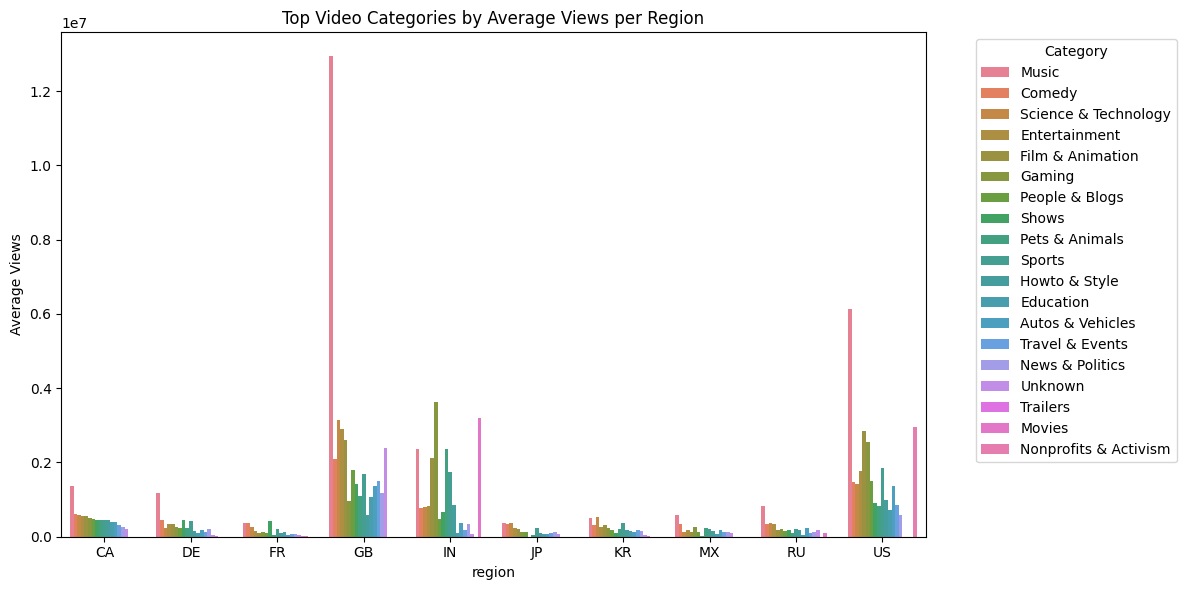

In [283]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories_by_region, x='region', y='views', hue='category')
plt.title('Top Video Categories by Average Views per Region')
plt.ylabel('Average Views')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This grouped bar chart provides a regional breakdown of average video views by content category, showing how content popularity varies across countries like the US, GB, IN, JP, and more.


----

1. Music Dominates Across Regions
Music consistently earns the highest average views across nearly all regions, with Great Britain (GB) showing a massive spike (over 12 million average views).

US, IN, and KR also show significant popularity for music content.

This highlights music’s universal appeal and strong shareability across cultures.

2. Nonprofits & Activism is a Standout in GB and US
GB and US both show high engagement in the Nonprofits & Activism category, possibly influenced by:

Political campaigns

Charity drives

Social justice initiatives

3. India’s Unique Profile
Gaming is exceptionally popular in India, even rivaling entertainment content.

Movies and Film & Animation also attract substantial views.

Suggests that India’s trending videos are skewed toward visual, cinematic, and interactive formats.

4. Diverse Tastes in US, Korea, and GB
US shows strong viewership in:

Music

News & Politics

Movies

Korea has high averages across:

Music

Entertainment

Film & Animation

5. Lower View Averages in Regions like JP, FR, RU
Categories in Japan, France, and Russia tend to have lower average views, indicating either:

A more evenly distributed trending pattern (less viral spikes)

Regional content preferences that don’t rely on large-scale virality

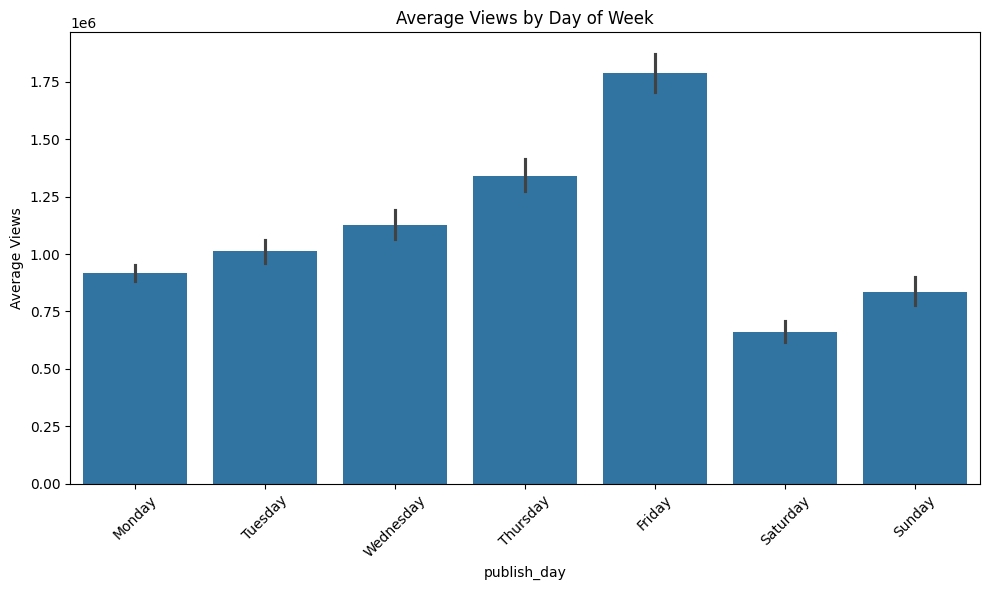

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='publish_day', y='views', estimator='mean', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Views by Day of Week')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart visualizes the average number of views that trending YouTube videos receive based on the day of the week they are published.

----

 1. Friday is the Peak Engagement Day
Videos published on Friday receive the highest average views by far — over 1.75 million on average.

This may be due to:

Increased user activity as the weekend begins

More leisure time to explore and share content

Platforms potentially boosting end-of-week uploads

 2. Gradual Build-Up During the Week
Views increase steadily from Monday to Thursday, suggesting:

Mid-week is a good window for building momentum

Audiences are active and engaged leading up to the weekend

 3. Weekends Underperform
Saturday and Sunday show a noticeable drop, especially Saturday (lowest).

Possible reasons:

Competing real-world activities reduce screen time

Algorithms may favor weekday uploads for initial traction

 4. Statistical Implications
Although this chart shows a clear trend by weekday, the Chi-Square test earlier showed no statistically significant association.

That suggests other variables (e.g., content type, country, promotion) may play a larger role in virality.



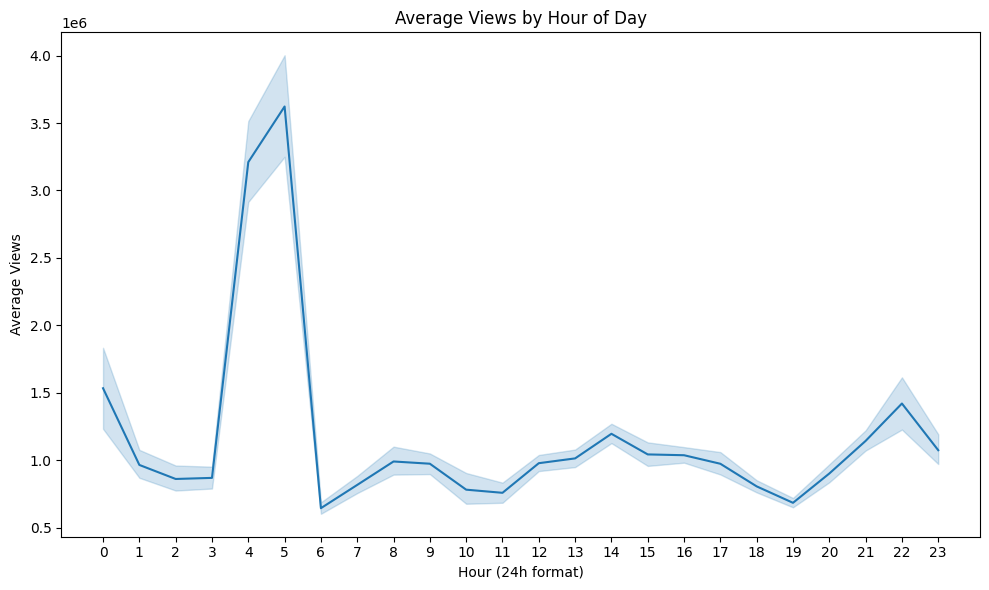

In [285]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='publish_hour', y='views', estimator='mean')
plt.title('Average Views by Hour of Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Average Views')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

This line chart shows how the average number of views on trending YouTube videos varies based on the hour of the day they were published, using a 24-hour format.

----

1. Very Early Morning Spike (Around 5 AM)
There’s a dramatic spike in average views for videos published at 4–5 AM.

This could be due to:

Content scheduled for global reach, hitting prime time across multiple time zones.

Automated publishing for major channels timed for algorithmic optimization.

Likely aligned with YouTube’s backend update cycle or homepage refreshes.

2. Sharp Drop After 6 AM
There is a significant drop in views immediately after 6 AM, continuing into the morning.

Suggests content published right after the early-morning peak is less likely to trend.

3. Gradual Rebound During Afternoon & Evening
Engagement rises again slightly between 12 PM and 5 PM, indicating:

Viewers returning after work/school hours.

Good slot for regional or time-sensitive content.

4. Late Night Bump (Around 10 PM - 11 PM)
There's a smaller but visible second peak around 10–11 PM.

This likely reflects late-night mobile usage or binge-watching behavior.

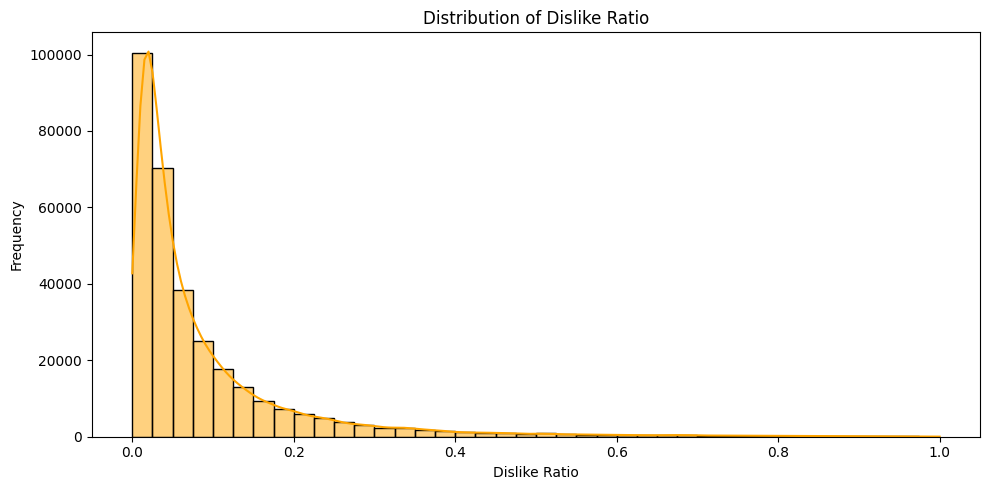

In [286]:
merged_df['dislike_ratio'] = merged_df['dislikes'] / (merged_df['likes'] + merged_df['dislikes'])

plt.figure(figsize=(10, 5))
sns.histplot(merged_df['dislike_ratio'], bins=40, kde=True, color='orange')
plt.title('Distribution of Dislike Ratio')
plt.xlabel('Dislike Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


This histogram illustrates the distribution of dislike ratios for trending YouTube videos.

----

1. Majority of Videos Have Low Dislike Ratios
Most trending videos have a dislike ratio below 0.1, meaning over 90% of user engagement is positive (likes).

Indicates that content which trends is generally well-received or positively curated by YouTube’s algorithms.

2. Right-Skewed Distribution
The plot shows a right-skewed (positively skewed) distribution:

A long tail of videos with higher dislike ratios (0.2 and above), but infrequent.

A small number of videos receive 20–40% dislikes, possibly due to:

Controversial topics

Misleading thumbnails or titles (clickbait)

Poor quality or spam content

3. Outliers Beyond 0.5
Very few videos exceed a dislike ratio of 0.5, meaning they were disliked more than liked.

These are rare but could signal controversy, public backlash, or poor relevance.

----

Use dislike ratio as a feature to identify:

Controversial videos (potential virality or reputation risk)

Misleading content (possible flag for moderation or review)

Set a threshold (e.g., dislike_ratio > 0.2) to classify videos as “controversial” in future engagement analyses.



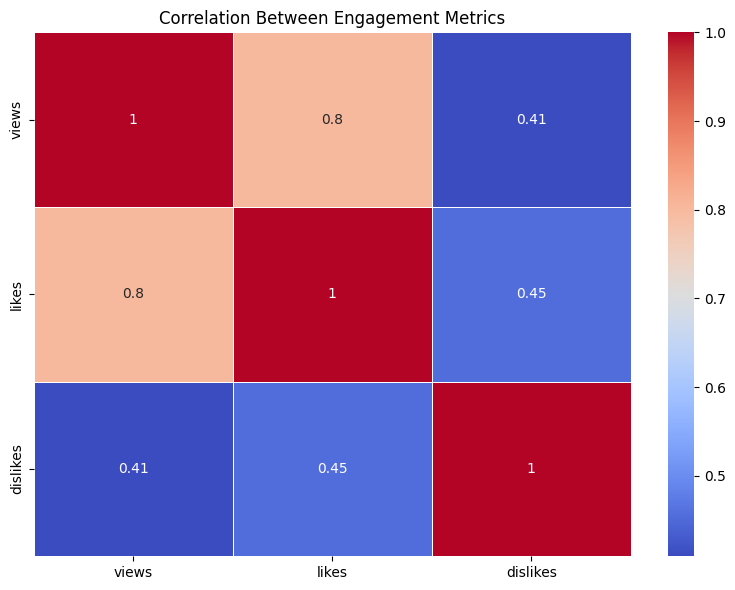

In [287]:
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['views', 'likes', 'dislikes']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Engagement Metrics')
plt.tight_layout()
plt.show()


This heatmap visualizes the Pearson correlation coefficients between three core engagement metrics for trending YouTube videos: views, likes, and dislikes.

---
1. Strong Link Between Views and Likes
With a correlation of 0.80, it’s clear that as a video gains more views, it tends to receive more likes.

This suggests likes are a strong proxy for popularity and audience approval.

2. Dislikes Are Less Predictable
Dislikes show only moderate correlation with likes and views, indicating they behave more variably:

Could depend on content polarity or viewer expectations.

Suggests dislikes may signal controversy or niche disagreement, not always scale.

3. Engagement Is Multidimensional
Trending content doesn’t just rely on likes — it may also attract debate or division, which boosts engagement metrics overall.


----

Likes are a reliable growth indicator, especially for content that aims to trend.

Dislikes can be a signal of attention, not just negativity — especially in controversial or highly topical videos.

Use all three metrics in multivariate models to predict video performance or categorize sentiment.

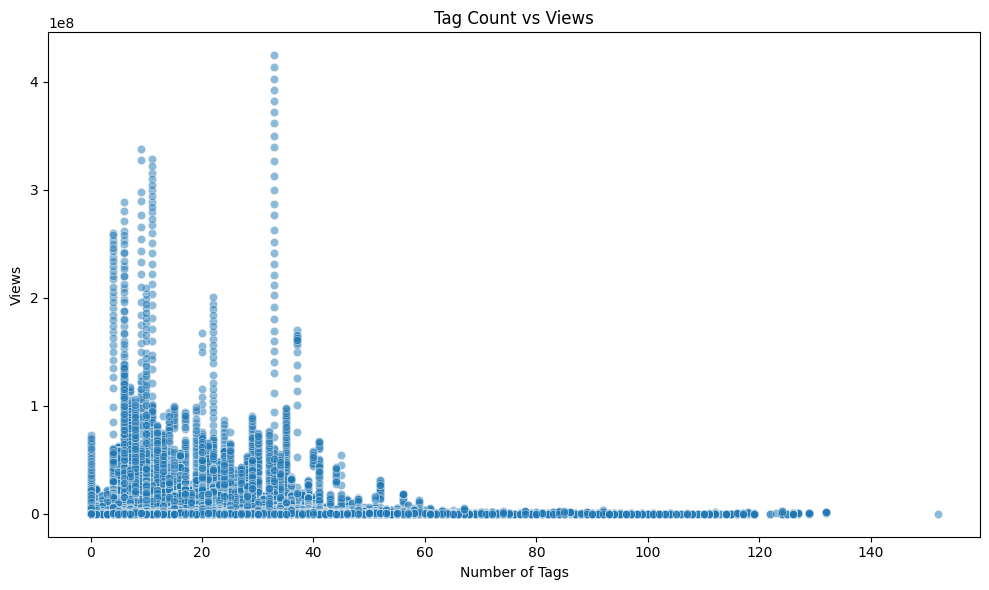

In [288]:
merged_df['tag_count'] = merged_df['tags'].apply(lambda x: 0 if x == '[none]' else len(str(x).split('|')))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='tag_count', y='views', alpha=0.5)
plt.title('Tag Count vs Views')
plt.xlabel('Number of Tags')
plt.ylabel('Views')
plt.tight_layout()
plt.show()


This scatter plot explores the relationship between the number of tags used in a video (tag_count) and its view count, across all trending YouTube videos in the dataset.

---

1. Most Popular Videos Use ~10–30 Tags
A dense cluster of high-performing videos sits in the 10–30 tag range.

These videos have view counts ranging from a few thousand to hundreds of millions.

This suggests a possible sweet spot for metadata optimization.

2. No Clear Linear Correlation
There’s no strong linear relationship between tag count and views — more tags don’t guarantee more views.

However, too few or too many tags (e.g., 0–5 or over 60) are rarely associated with very high view counts.

3. Diminishing Returns After 40+ Tags
After around 40 tags, videos are almost never highly viewed.

This may be due to:

Tag stuffing, which could reduce content quality signals

Algorithmic penalties or irrelevance

4. Some Anomalies
A small number of outliers with extremely high views appear even at 35+ tags — possibly music videos or promotional content from top creators.

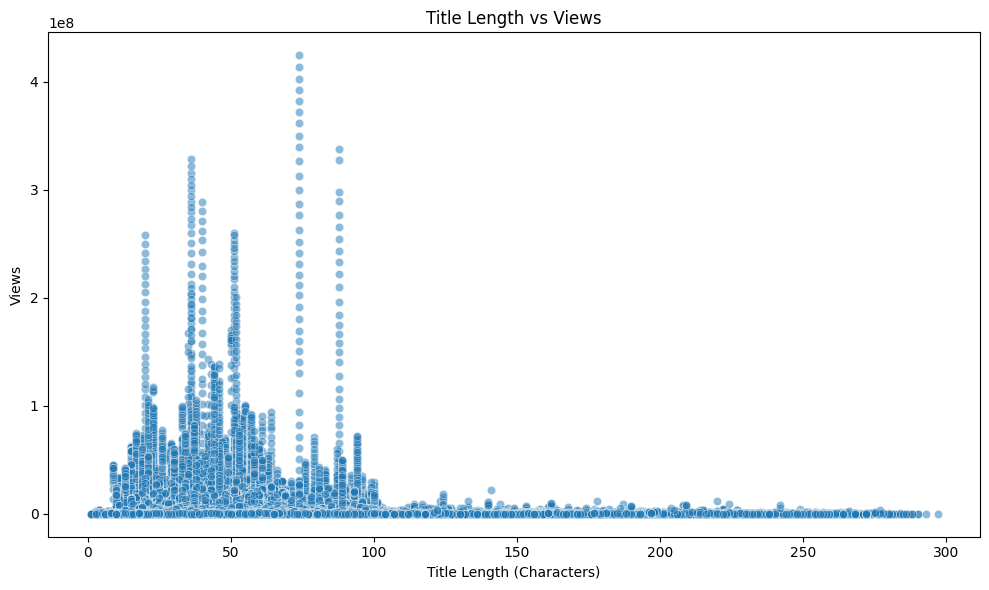

In [289]:
merged_df['title_length'] = merged_df['title'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='title_length', y='views', alpha=0.5)
plt.title('Title Length vs Views')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Views')
plt.tight_layout()
plt.show()


This scatter plot investigates the relationship between a video’s title length (in characters) and its view count across all trending YouTube videos.


----


1. Sweet Spot: 30–70 Characters
Most high-performing videos (those with tens to hundreds of millions of views) have titles between 30 and 70 characters.

This range is long enough to be descriptive, yet concise enough to remain readable and clickable.

2. No Linear Relationship
There is no strong correlation between title length and view count.

Both short and long titles can trend — but the majority of highly viewed videos are clustered in a mid-length range.

3. Very Long Titles (>100 Characters) Underperform
Titles longer than 100 characters show significantly fewer high-view videos.

These may be:

Truncated in search or feed previews

Perceived as spammy or overwhelming

4. Outliers at 60–90 Characters
Some of the most viral videos (over 100M+ views) use titles in this range.

Suggests well-optimized titles may pack keywords and intrigue into a medium-length frame.

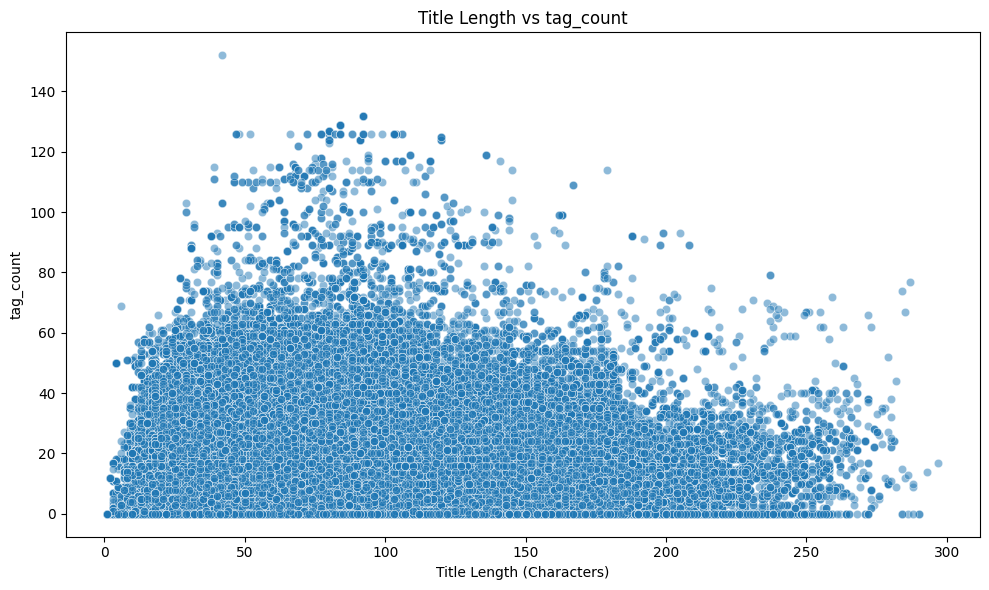

In [290]:
merged_df['title_length'] = merged_df['title'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='title_length', y='tag_count', alpha=0.5)
plt.title('Title Length vs tag_count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('tag_count')
plt.tight_layout()
plt.show()


This scatter plot illustrates the relationship between the length of video titles (in characters) and the number of tags used in those videos.

---

1. No Strong Correlation
There’s no clear linear relationship between title length and number of tags.

Videos with both short and long titles can have either few or many tags.

This implies that title writing and tagging are likely managed independently, possibly by different teams or algorithms.

2. Most Common Range:
Majority of videos cluster around:

Title lengths of 30–100 characters

Tag counts between 10–80

This reflects typical behavior: moderately descriptive titles with reasonable metadata tagging.

3. Drop in Tag Count Beyond 150 Characters
Videos with very long titles (150+ characters) rarely have high tag counts.

This might be due to:

A shift in strategy — long titles already contain descriptive keywords.

Content creators focusing on one form of optimization over another.

4. Max Tag Counts Peak Between 50–100 Title Characters
A few videos with 100+ tags tend to have title lengths between 50 and 100.

Likely cases of SEO-optimized uploads, possibly from corporate or high-traffic channels

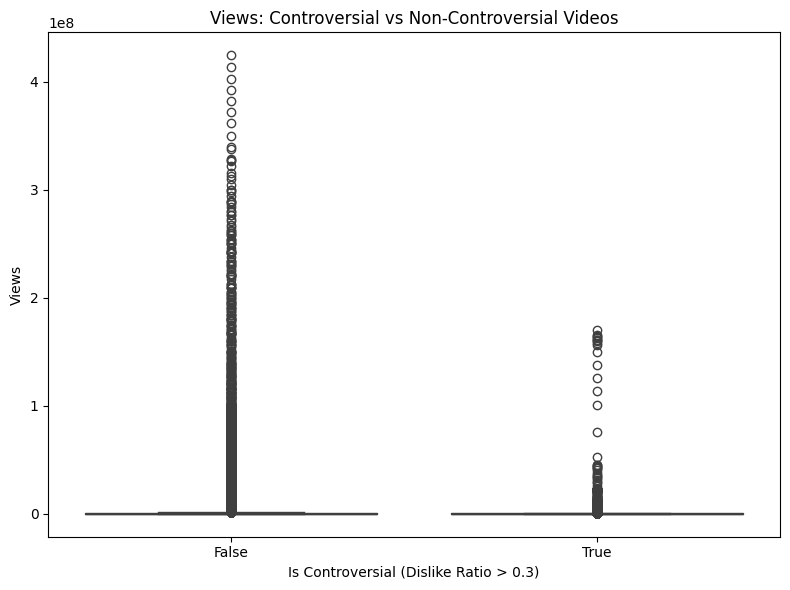

In [291]:
merged_df['is_controversial'] = merged_df['dislike_ratio'] > 0.3

plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='is_controversial', y='views')
plt.title('Views: Controversial vs Non-Controversial Videos')
plt.xlabel('Is Controversial (Dislike Ratio > 0.3)')
plt.ylabel('Views')
plt.tight_layout()
plt.show()


This boxplot compares the view counts of controversial vs non-controversial videos, where controversy is defined by a dislike ratio greater than 0.3 (i.e., more than 30% of reactions are dislikes).


---


 1. Non-Controversial Videos Dominate in Views
Non-controversial videos (Dislike Ratio ≤ 0.3) generally achieve much higher views.

The median and upper quartile of view counts for non-controversial videos are significantly higher than for controversial ones.

Some non-controversial videos exceed 400 million views — indicating strong audience approval helps content scale virally.

 2. Controversial Videos Still Get Attention
While the median views are lower, controversial videos still attract substantial engagement.

The presence of outliers with over 100 million views in the controversial category suggests that controversy can amplify visibility, even if it limits broader approval.

 3. Cleaner Engagement Drives Virality
Non-controversial videos likely benefit from:

Better algorithmic promotion

Higher user retention and shareability

Positive viewer sentiment

 4. Controversy = Risk/Reward
Controversial videos might:

Generate buzz and clicks

But also face backlash, limited monetization, or restricted promotion


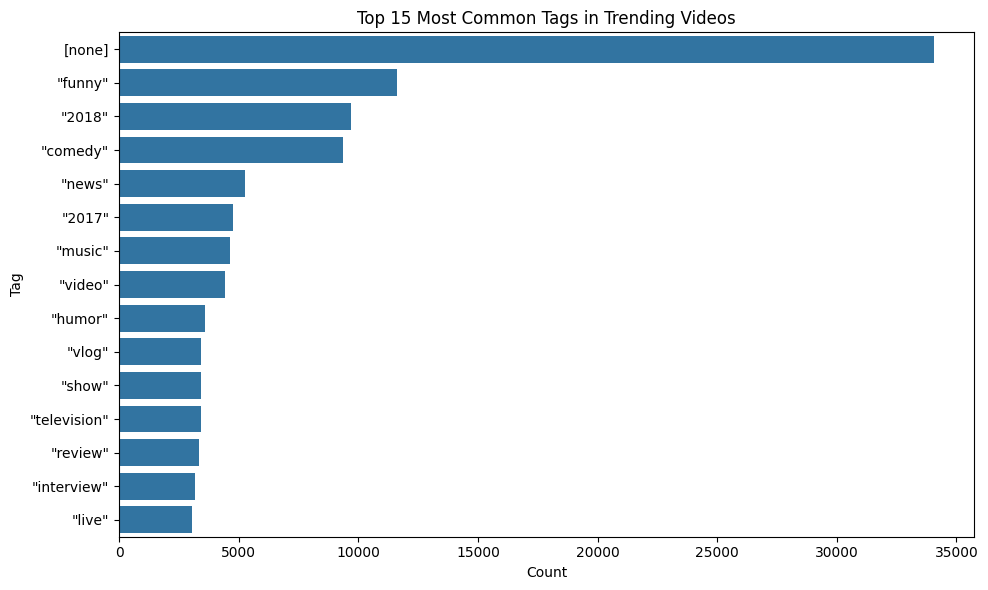

In [292]:
from collections import Counter

all_tags = merged_df['tags'].dropna().str.cat(sep='|').split('|')
tag_counts = Counter(all_tags)
tag_df = pd.DataFrame(tag_counts.most_common(15), columns=['Tag', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=tag_df, x='Count', y='Tag')
plt.title('Top 15 Most Common Tags in Trending Videos')
plt.tight_layout()
plt.show()

This horizontal bar chart displays the 15 most frequently used tags across all trending YouTube videos in the dataset, offering insights into popular themes and metadata strategies.


---

1. "[none]" Dominates
The most common tag is [none], indicating a large portion of videos do not use tags at all.

Despite this, they still manage to trend, suggesting that tags are helpful but not essential for trending success — other factors like title, thumbnail, and engagement might outweigh tag usage.

2. Humor and Entertainment Tags Are Prevalent
Top tags include:

"funny"

"comedy"

"humor"

"vlog"

"show"

This suggests that light-hearted and entertaining content is dominant in the trending space.

3. News & Current Events Have a Presence
Tags like "news", "2017", and "2018" reflect videos that relate to current events or were timely when uploaded.

Shows that recency and relevance help content trend.

4. Media & Production Tags
Tags such as "music", "television", "review", "interview", and "live" indicate professional or semi-professional production.

These keywords are often used by news, entertainment, and media channels.

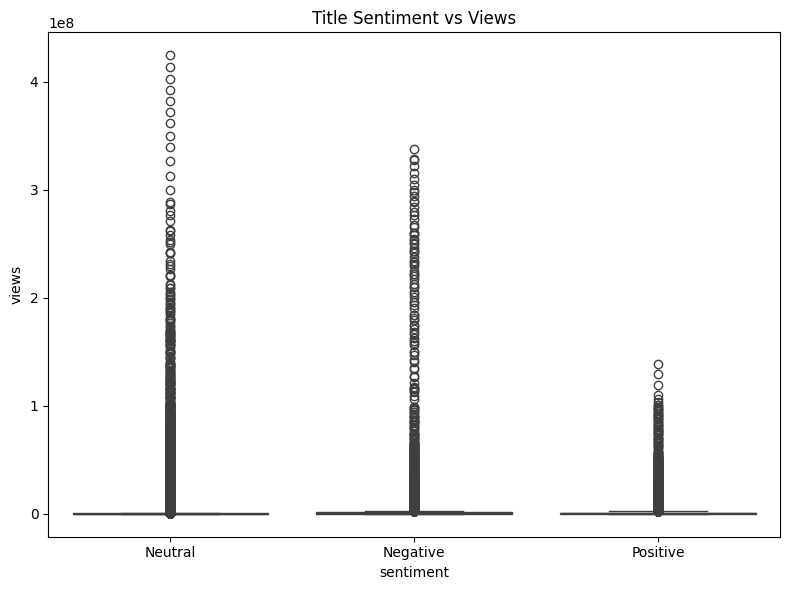

In [293]:
from textblob import TextBlob

merged_df['title_sentiment'] = merged_df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def sentiment_label(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['sentiment'] = merged_df['title_sentiment'].apply(sentiment_label)

plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='sentiment', y='views')
plt.title('Title Sentiment vs Views')
plt.tight_layout()
plt.show()


This boxplot provides a closer inspection of how the sentiment of a video's title—categorized as Positive, Neutral, or Negative—relates to its view count.


---

1. Neutral Titles Lead in Views
Contrary to expectations, neutral sentiment titles have the highest view potential, as seen by:

The highest maximum outliers (some above 400M views)

A slightly higher median than other groups

These titles may:

Be more factual or SEO-optimized

Include less emotion, which may help with algorithm neutrality

2. Negative Titles Still Perform Well
Negative titles exhibit surprisingly high top-end views, including multiple outliers above 300M.

Possible drivers:

Controversial content or critique

Emotional hooks driving curiosity and engagement

However, the median is lower than Neutral, suggesting greater variance in performance.

3. Positive Titles Are More Conservative
Positive sentiment titles have:

The lowest upper outliers

A tighter IQR (interquartile range), indicating more consistent, but modest reach

These may feel uplifting but less urgent, leading to less virality despite being well-liked.



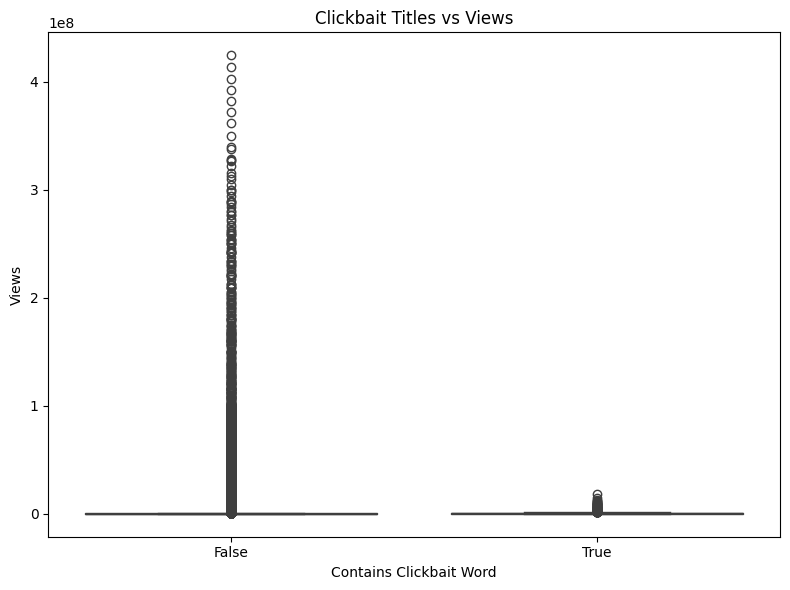

In [294]:
clickbait_keywords = ['shocking', 'must watch', 'you won’t believe', 'unbelievable', 'crazy', 'insane', 'epic']

def is_clickbait(title):
    return any(re.search(rf'\b{word}\b', str(title).lower()) for word in clickbait_keywords)

merged_df['is_clickbait'] = merged_df['title'].apply(is_clickbait)

plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='is_clickbait', y='views')
plt.title('Clickbait Titles vs Views')
plt.xlabel('Contains Clickbait Word')
plt.ylabel('Views')
plt.tight_layout()
plt.show()


This boxplot compares the view counts of videos with and without clickbait-style keywords in their titles. The clickbait terms used in this analysis include:
"shocking", "must watch", "you won’t believe", "unbelievable", "crazy", "insane", "epic".

---


1. Clickbait Titles Have Lower View Distributions
Videos that contain clickbait words consistently show:

Lower medians

Fewer outliers

No high view count extremes (>100M views)

This suggests that clickbait does not perform well on trending YouTube videos.

2. Non-Clickbait Titles Dominate High Performance
All the highest-performing outliers (up to 400M+ views) come from non-clickbait titles.

These titles may:

Be more trustworthy or professional

Be preferred by YouTube’s algorithm, which favors authentic, descriptive titles

----

Clickbait may work on some platforms (e.g., thumbnails on social media), but on YouTube trending content:

Authenticity trumps shock value

Descriptive, engaging, and informative titles build more trust and traction



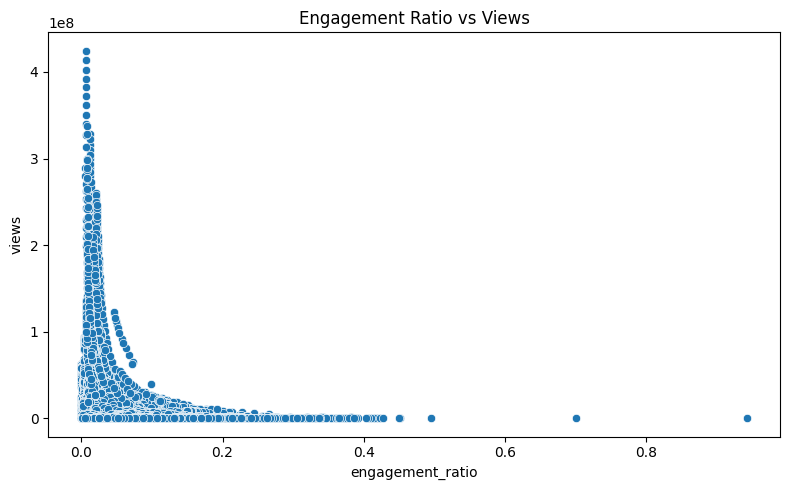

In [295]:
merged_df['engagement_ratio'] = merged_df['likes'] / merged_df['views']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='engagement_ratio', y='views')
plt.title('Engagement Ratio vs Views')
plt.tight_layout()
plt.show()


This scatter plot visualizes the relationship between a video’s engagement ratio (likes / views) and its total view count.

---

 1. Inverse Relationship
The plot clearly shows a strong inverse pattern:

As views increase, the engagement ratio (likes per view) tends to decrease.

Highly viewed videos have much lower engagement ratios, often below 1%.

 2. High Engagement ≠ High Reach
Some videos with very high engagement ratios (>10%) exist — but they rarely go viral.

This suggests:

These may be niche, targeted content with strong appeal to small audiences.

Viral videos attract a broader audience with lower relative engagement.

 3. Scalable Content = Wide but Shallow
Viral success appears to trade off depth of interaction (engagement) for breadth of exposure (views).

Algorithms may favor content that draws broad appeal, even if fewer people interact deeply.



---


Engagement ratios are valuable for measuring community connection or audience enthusiasm, but they shouldn’t be the sole metric for evaluating content success on platforms like YouTube. Viral visibility often depends more on clicks, watch time, and shareability than raw likes.



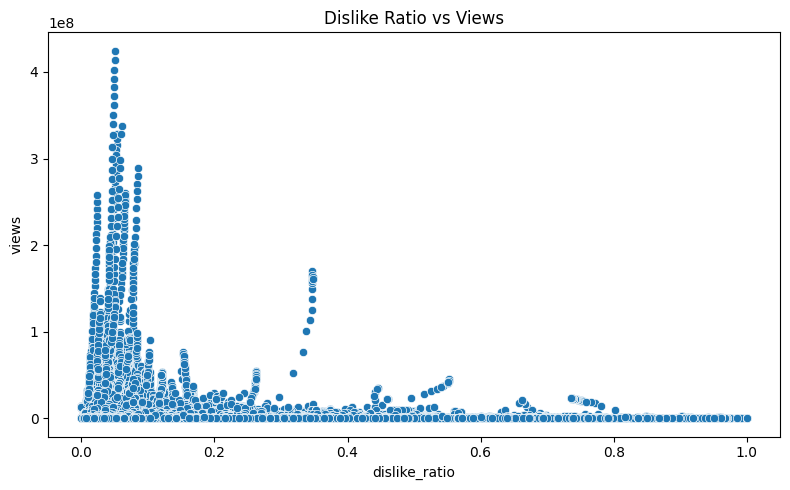

In [296]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='dislike_ratio', y='views')
plt.title('Dislike Ratio vs Views')
plt.tight_layout()
plt.show()


This scatter plot illustrates the relationship between a video’s dislike ratio (dislikes / (likes + dislikes)) and its total view count.

---

1. Dislike Ratio Increases, Views Decrease
A clear negative correlation exists between dislike ratio and views:

Most high-view videos have low dislike ratios, generally below 0.2 (20%).

As dislike ratio approaches 0.5 or higher, views tend to fall sharply.

2. Controversy Doesn’t Scale Well
Even though some controversial videos (with dislike ratio > 0.3) reach millions of views, they are:

Far fewer in number

Highly variable in view performance

This confirms that controversial or polarizing content may attract attention, but rarely achieves consistent virality.

3. Very High Dislike Ratios Are Outliers
Content with dislike ratios nearing 1.0 (i.e., almost all reactions are dislikes) is extremely rare and generally performs poorly in terms of viewership.

These may represent scams, misleading content, or algorithmically penalized uploads.


---


To maximize visibility and reach, content creators should strive to maintain a low dislike ratio, suggesting they are:

Delivering on expectations

Avoiding misleading or polarizing elements

Creating positive viewer experiences

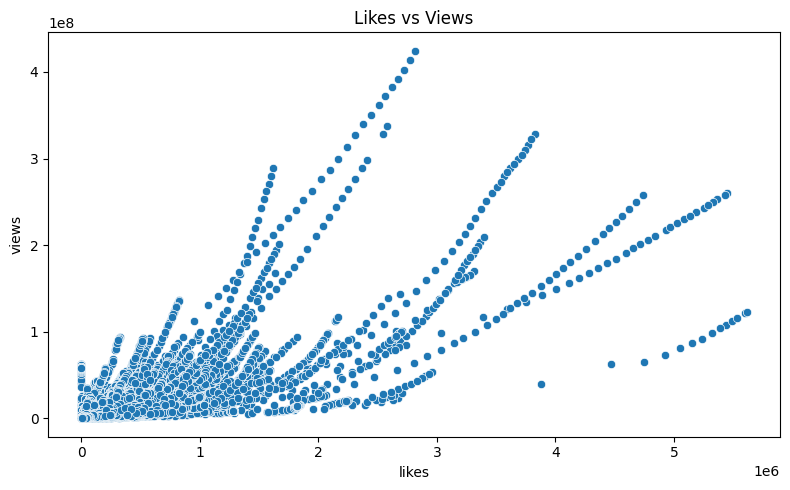

In [297]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='likes', y='views')
plt.title('Likes vs Views')
plt.tight_layout()
plt.show()

This scatter plot explores the relationship between the number of likes a video receives and its total views on YouTube trending content.

---

1. Strong Positive Correlation
There is a clear upward trend: as the number of likes increases, so does the number of views.

This indicates that likes are a strong indicator of popularity and likely influence the algorithm in surfacing content more frequently.

2. Non-Linear Spread Suggests Threshold Effects
The plot shows a non-uniform spread, with lines or bands of data points:

These may represent videos from specific high-subscriber channels or categories with consistent ratios.

Some creators have a predictable "likes-to-views" pattern across uploads.

3. High Likes ≠ Guaranteed Virality
A few points with millions of likes don’t always correspond to the highest views.

This suggests virality may also depend on:

Title and thumbnail effectiveness

Watch time and retention

Platform or regional trends

---


While likes are highly correlated with view counts, they’re just one piece of the virality puzzle. A comprehensive approach that includes engaging content, SEO-friendly titles, and algorithm-aware timing is key for reaching the trending charts.




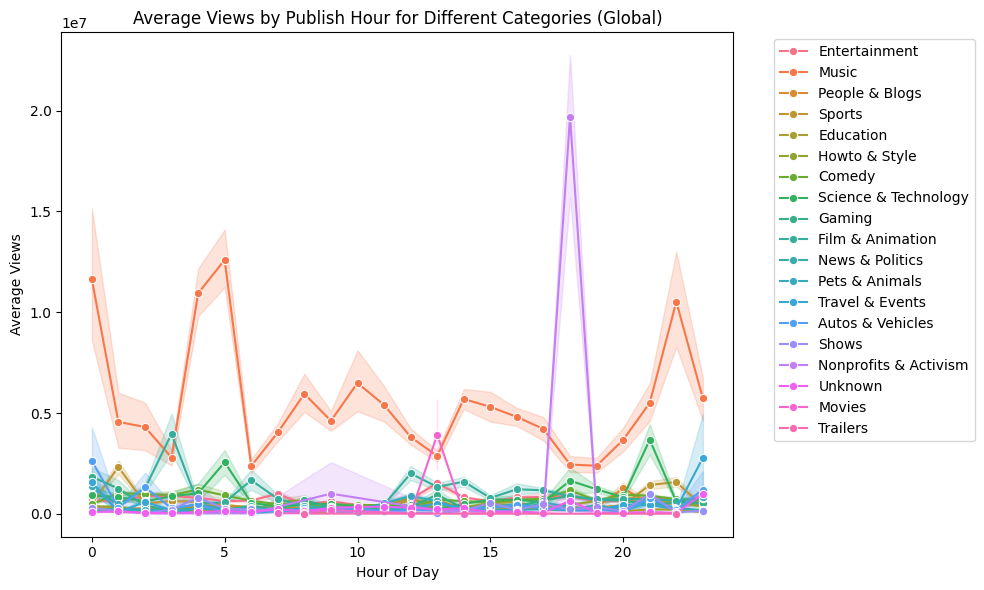

In [298]:
plt.figure(figsize=(10,6))
sns.lineplot(x="publish_hour", y="views", hue="category", data=merged_df, marker="o")
plt.title("Average Views by Publish Hour for Different Categories (Global)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Views")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This line plot explores how the publish hour of YouTube videos affects their average view count, broken down by content category.

---

 1. Music Videos Dominate Late-Night and Early-Morning Hours
The Music category consistently outperforms all others in view count—particularly during:

Late night (0–2 AM)

Early morning (4–6 AM)

Evening spikes (around 18–22 PM)

 2. Entertainment and Film & Animation Perform Well Around Prime Time
These categories experience modest spikes in afternoon and early evening slots (15:00–20:00), aligning with prime viewing times.

 3. Most Other Categories Stay Flat
Categories like Education, Science & Technology, Howto & Style, and Nonprofits & Activism show:

Very low average views overall

Minimal impact from publish time

These may appeal to niche audiences with steady but smaller engagement.

 4. Notable Outliers & Irregularities
One sharp spike is seen in Nonprofits & Activism at hour 17 or 18, but this may be due to one or few viral videos, not a trend.

This highlights the importance of view normalization and outlier detection in analysis.



---

Music content should be timed strategically to maximize early-morning and night-time traffic.

Entertainment and film thrive when aligned with after-school/work hours.

Educational and niche content benefit more from search optimization and audience targeting than publish timing.

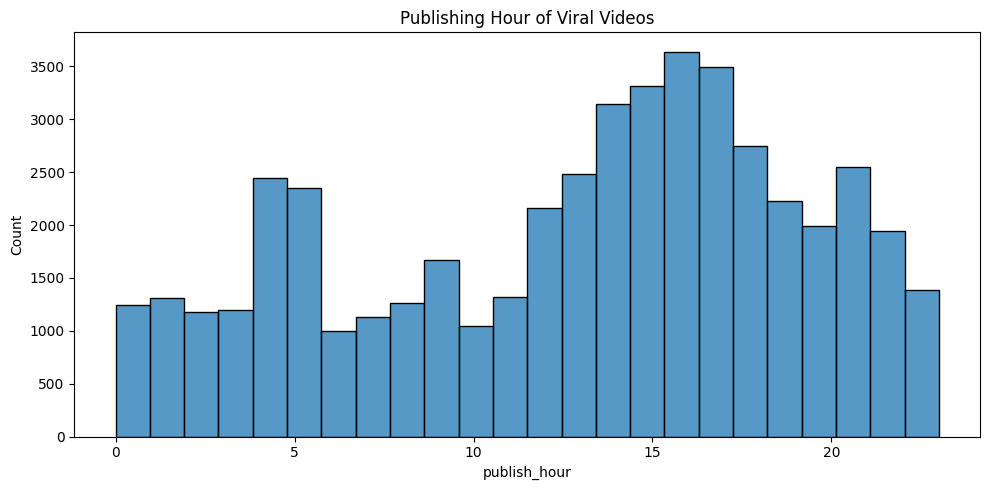

In [300]:

plt.figure(figsize=(10, 5))
sns.histplot(data=merged_df[merged_df['is_viral']], x='publish_hour', bins=24, kde=False)
plt.title('Publishing Hour of Viral Videos')
plt.tight_layout()
plt.show()



This histogram displays the distribution of publishing hours for videos that achieved viral status (defined as views > 1,000,000).

---


 1. Peak Viral Publishing Times:
Viral videos are most frequently published during:

Afternoon hours (12:00 PM – 18:00 PM), peaking around 16:00.

A secondary cluster appears around 4:00–5:00 AM, possibly due to scheduled global releases or optimization for early risers in specific regions.

 2. Early Morning Hours Have Fewer Viral Videos
Very few viral videos are published between 1:00 AM – 6:00 AM, suggesting that this timeframe might be less favorable for virality—unless targeting international audiences.

---

While engaging content is key, timing matters too—especially for maximizing visibility in YouTube’s recommendation system. Afternoon publishing aligns with:

User availability after school/work

YouTube's algorithm surfacing fresh uploads

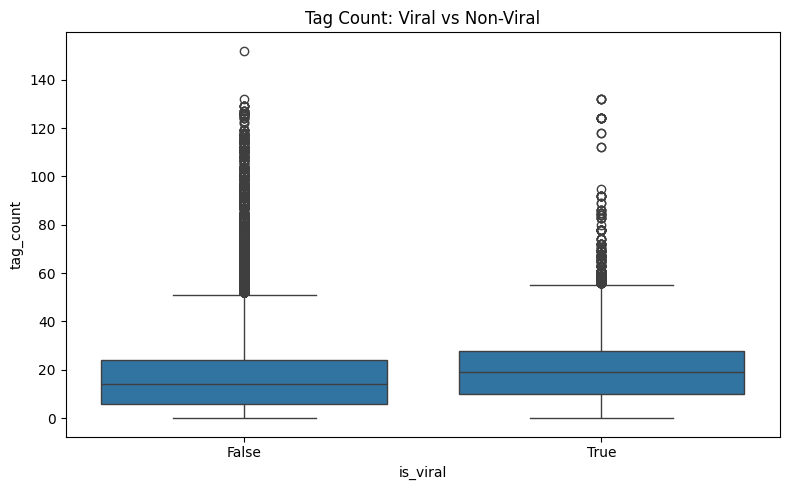

In [301]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='is_viral', y='tag_count')
plt.title('Tag Count: Viral vs Non-Viral')
plt.tight_layout()
plt.show()

This box plot compares the number of tags used between viral and non-viral YouTube videos.


---

1. Viral Videos Tend to Use More Tags
Median tag count for viral videos is higher than non-viral ones.

Viral videos generally fall in the 15–35 tags range.

Non-viral videos have a lower median and a broader spread, with many using fewer than 10 tags.

2. Outliers Exist in Both Groups
Both viral and non-viral categories include extreme tag counts (some with over 100 tags).

However, these are outliers and may not reflect common best practices.



----

Using more tags appears to slightly correlate with increased virality, likely due to:

Improved search discoverability

Broader relevance across topics

Enhanced algorithmic exposure

But there’s a point of diminishing returns: excessively tagged videos (100+ tags) don’t guarantee high views and may even seem spammy to algorithms.

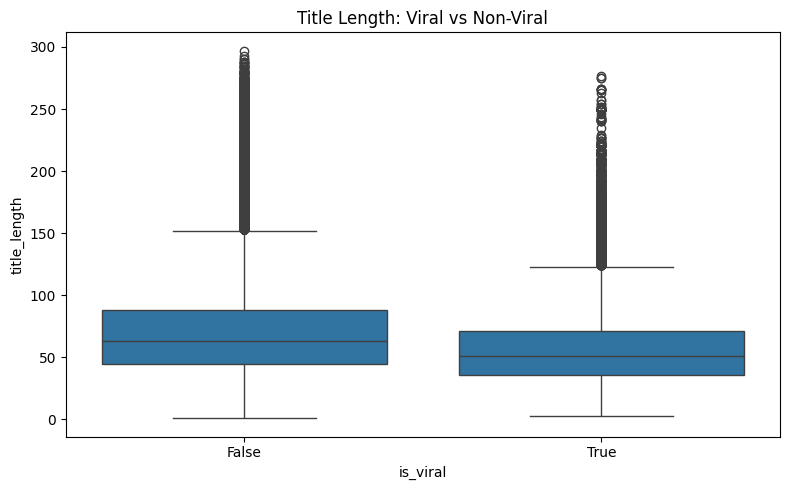

In [302]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='is_viral', y='title_length')
plt.title('Title Length: Viral vs Non-Viral')
plt.tight_layout()
plt.show()

This box plot compares the title length (in characters) of viral versus non-viral YouTube videos.



----


1. Viral Videos Have Slightly Shorter Titles
Median title length for viral videos is around 50 characters.

Non-viral videos show a slightly higher median, approximately 65–70 characters.

This suggests that concise titles may contribute to higher engagement and virality.

2. Distribution is Similar, but Viral Titles are More Consistent
Viral video titles are tightly distributed within a narrower range.

Non-viral titles exhibit greater variation, including longer outliers beyond 150+ characters.

Titles longer than 100 characters are more common among non-viral videos.


---



While both groups show a wide range of title lengths, viral videos favor tighter, more concise titles. This supports the idea that brevity and clarity help capture attention quickly, which is crucial in the YouTube feed.

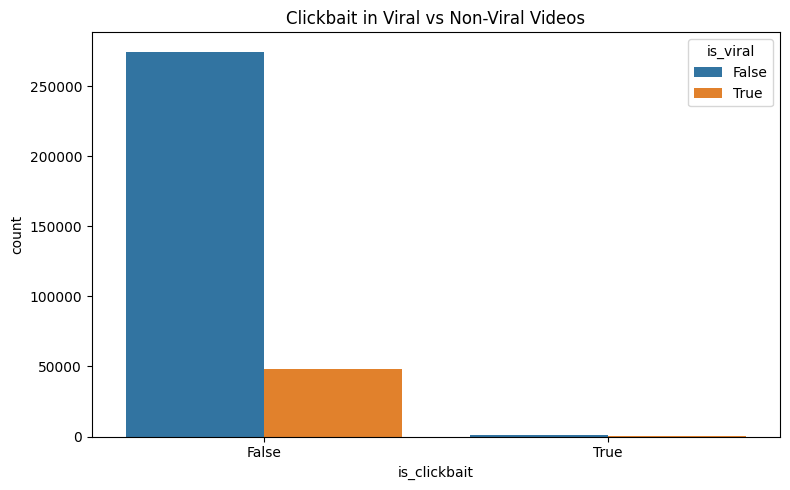

In [303]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='is_clickbait', hue='is_viral')
plt.title('Clickbait in Viral vs Non-Viral Videos')
plt.tight_layout()
plt.show()


This bar chart explores the relationship between clickbait-style titles and a video's likelihood of becoming viral (defined here as having more than 1 million views).

----

1. Most Videos Are Non-Clickbait
The vast majority of videos (both viral and non-viral) do not contain clickbait keywords such as “shocking,” “must watch,” etc.

Clickbait titles are relatively rare overall in the dataset.

2. Clickbait Titles Are Not Strongly Associated with Virality
Among clickbait titles, very few become viral.

The proportion of viral videos among clickbait titles is noticeably lower than among non-clickbait ones.



----


Contrary to popular belief, clickbait does not significantly increase the chances of virality on YouTube—at least in the context of this dataset. In fact, it may correlate slightly negatively with virality.

This might suggest that users are increasingly resistant to clickbait tactics and prefer more authentic, value-driven titles.


----


Avoid overusing clickbait phrases. Instead, focus on:

Clear, relevant titles

Creating intrigue without misleading

Leveraging authentic value or uniqueness

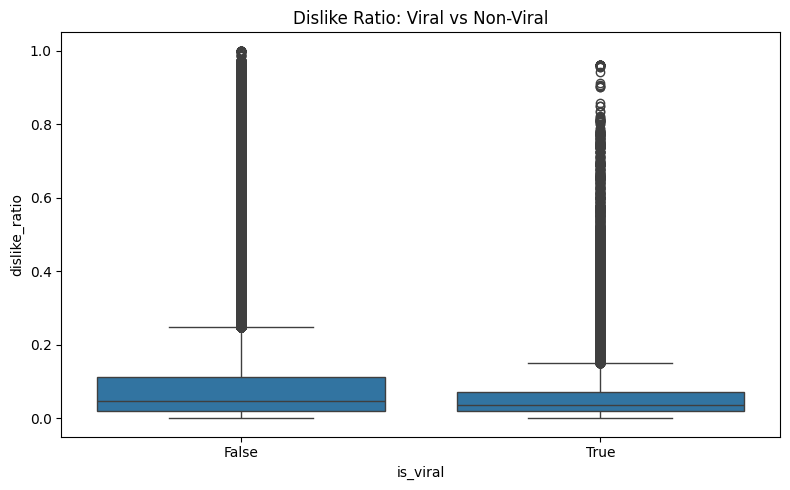

In [304]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='is_viral', y='dislike_ratio')
plt.title('Dislike Ratio: Viral vs Non-Viral')
plt.tight_layout()
plt.show()

This boxplot compares the dislike ratio—calculated as dislikes / (likes + dislikes)—between viral and non-viral YouTube videos.

----


Central Tendencies Are Similar

The median dislike ratios for both viral and non-viral videos are low and fairly close, typically under 0.1.

This indicates that most videos, regardless of virality, are generally well-received.

Non-Viral Videos Show a Slightly Wider Spread

Non-viral videos have a broader distribution of dislike ratios, suggesting a greater diversity in audience response.

There are more extreme outliers (videos with high dislike ratios) among non-viral content.

Viral Videos Are Less Likely to Be Heavily Disliked

Fewer viral videos exhibit very high dislike ratios.

This suggests that negativity in audience reaction may limit a video's ability to go viral.


----


While dislike ratio alone doesn't guarantee virality, videos that perform well tend to avoid extreme negative feedback. In other words, viral videos typically strike a balance between visibility and audience approval.

This aligns with the idea that virality isn't just about grabbing attention, but also about sustaining viewer interest and positive engagement.


----


Focus on content that resonates positively with viewers.

Avoid controversial or divisive content unless it's purposefully part of your branding.

Pay attention to feedback metrics (likes, dislikes, comments) as early signals of performance.




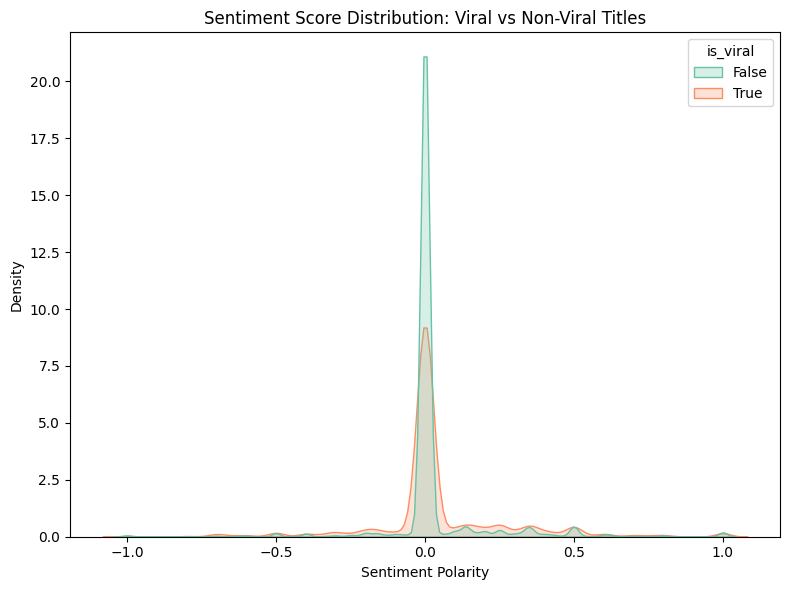

In [305]:

merged_df['title_sentiment'] = pd.to_numeric(merged_df['title_sentiment'], errors='coerce')
sentiment_df = merged_df.dropna(subset=['title_sentiment'])

fig4 = plt.figure(figsize=(8, 6))
sns.kdeplot(data=sentiment_df, x='title_sentiment', hue='is_viral', fill=True, common_norm=False, palette='Set2')
plt.title('Sentiment Score Distribution: Viral vs Non-Viral Titles')
plt.xlabel('Sentiment Polarity')
plt.tight_layout()


This kernel density plot visualizes the distribution of sentiment polarity scores (from -1 to 1) for video titles, comparing viral and non-viral YouTube videos.


----


Sentiment polarity is measured using TextBlob:

-1 = very negative sentiment

0 = neutral

+1 = very positive sentiment

The two curves represent the distribution for:

Viral videos (orange)

Non-viral videos (green)


----


1. Both Groups Are Strongly Centered at Neutral (0)

The vast majority of titles—whether viral or not—have neutral sentiment, likely due to straightforward or descriptive phrasing.

2. Viral Titles Are Slightly More Polarized

Viral videos show slightly more spread into positive and negative sentiment zones.

This suggests that emotionally charged titles may contribute marginally to virality.

3. Non-Viral Titles Cluster Tightly Around 0

A narrower, taller peak implies that non-viral titles are more conservative in tone.

----

While most video titles are neutral, viral titles tend to lean slightly more emotionally charged, possibly to attract attention or provoke curiosity. However, sentiment alone is not a strong predictor of virality—it's one of many contributing factors.

----

Using emotional language (positive or negative) might slightly boost engagement, but it's not a silver bullet.

Content creators should consider sentiment tone as a stylistic tool, but prioritize relevance and clarity for sustainable success.


## Statistical Questions

In [306]:
from scipy.stats import chi2_contingency, kruskal

In [307]:
print("\n--- Chi-Square Test: Day of Week vs Viral Status ---")
day_viral_table = pd.crosstab(merged_df['publish_day'], merged_df['is_viral'])
chi2_stat, p_val_day, dof, expected = chi2_contingency(day_viral_table)
print(f"Chi² Statistic: {chi2_stat:.2f}")
print(f"p-value: {p_val_day:.3f}")
if p_val_day < 0.05:
    print("Conclusion: Significant association between day and viral status.")
else:
    print("Conclusion: No significant association.")



--- Chi-Square Test: Day of Week vs Viral Status ---
Chi² Statistic: 1458.16
p-value: 0.000
Conclusion: Significant association between day and viral status.


This statistical test evaluates whether there's a significant association between the day a video is published and its likelihood of going viral.


----


Since the p-value is well below 0.05, we reject the null hypothesis.

Conclusion: There is a statistically significant relationship between the day of the week a video is published and whether it becomes viral.

----

This finding suggests that publishing day matters—some days are more favorable for videos to gain traction and go viral. Strategic scheduling can be leveraged to maximize visibility and engagement.

In [309]:
print("\n--- Kruskal-Wallis H-Test: Engagement Ratio across Categories ---")
engagement_groups = [group['engagement_ratio'].dropna() for name, group in merged_df.groupby('category') if len(group) > 1]
kruskal_stat, p_val_kruskal = kruskal(*engagement_groups)
print(f"H Statistic: {kruskal_stat:.2f}")
print(f"p-value: {p_val_kruskal:.3f}")
if p_val_kruskal < 0.05:
    print("Conclusion: Significant difference in engagement across categories.")
else:
    print("Conclusion: No significant difference across categories.")


--- Kruskal-Wallis H-Test: Engagement Ratio across Categories ---
H Statistic: 37804.77
p-value: 0.000
Conclusion: Significant difference in engagement across categories.


This non-parametric test checks whether the distribution of engagement ratios (likes/views) differs significantly across various video categories on YouTube.

----

Since the p-value is far below 0.05, we reject the null hypothesis.

Conclusion: There is a statistically significant difference in engagement ratios across video categories.


----

Not all content categories are equally engaging for viewers.

Categories like Music, Nonprofits & Activism, or Entertainment might be driving much higher or lower viewer interactions compared to others.



## Additional Questions

### Q1. What is the optimal publishing hour for viral videos across top-performing categories?

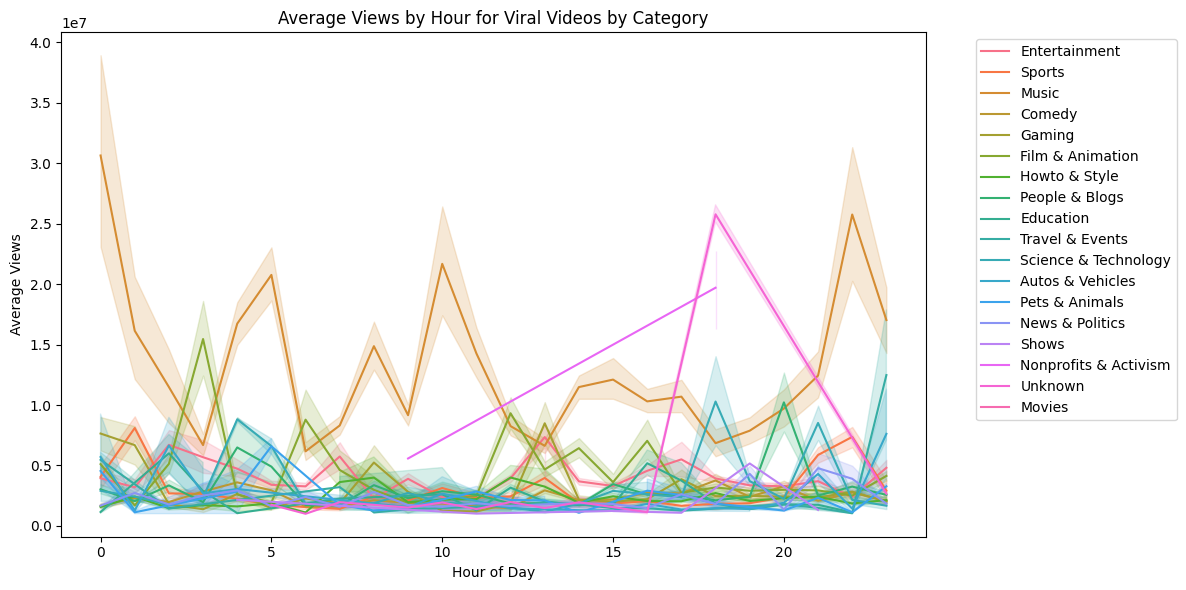

In [310]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df[merged_df['is_viral']], x='publish_hour', y='views', hue='category', estimator='mean')
plt.title('Average Views by Hour for Viral Videos by Category')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This line plot illustrates average views per publishing hour for viral videos, segmented by category.

---

Clear Winners – Early Morning Surge:

Comedy and Music videos see massive spikes in average views when published between midnight (0:00) and 6:00 AM, with several peaks above 20M–30M views.

These categories appear to benefit from either:

Global audiences catching content during their morning hours, or

Strategic midnight releases that align with daily refreshes of the trending algorithm.

Stable but Strong:

Gaming, Film & Animation, and Entertainment categories show more even distributions but still perform well in the late morning (9 AM–11 AM) and early evening (4 PM–7 PM).

This suggests strong engagement throughout the day, especially after school/work hours.

Outlier Patterns:

Unknown and Movies categories display sporadic, inconsistent peaks. While they occasionally achieve high view counts, their performance isn’t tied to a specific hour.

This could imply viral spikes unrelated to timing (e.g., due to topic virality, influencer involvement, or sudden news relevance).





### Q2. Do viral videos show higher engagement ratios compared to non-viral ones?

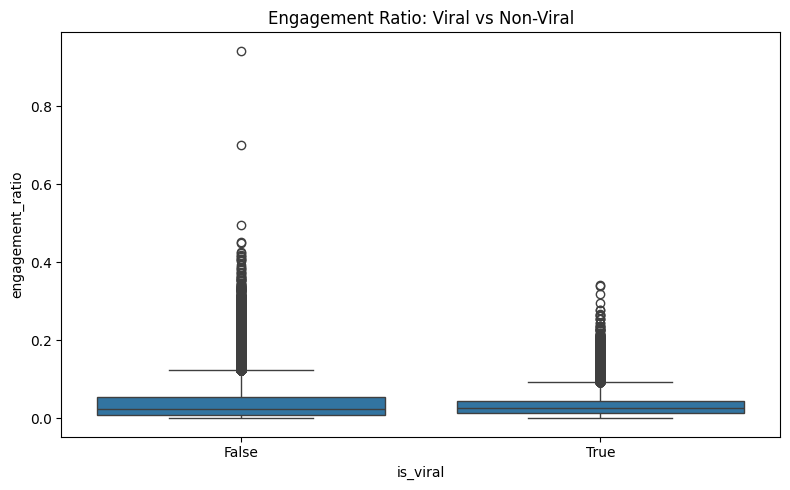

In [311]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='is_viral', y='engagement_ratio')
plt.title('Engagement Ratio: Viral vs Non-Viral')
plt.tight_layout()
plt.show()

This box plot compares the engagement ratio (likes / views) between videos labeled as viral (views > 1,000,000) and those that are not.


----

1. Engagement Ratio is Relatively Similar Across Groups
Both viral and non-viral videos share similar median engagement ratios, clustered around:

0.02 to 0.04 (i.e., 2–4% of viewers like the video)

The similarity suggests that high engagement alone doesn’t guarantee virality.

2. Viral Videos Show Slightly Tighter Distribution
Fewer extreme outliers are visible for viral content.

Viral videos tend to have more consistent engagement behavior, possibly due to:

Larger sample sizes (more views)

Broader audience reach

3. Non-Viral Videos Have More Variability
Non-viral videos display a broader range of engagement ratios:

Some videos achieve very high engagement ratios (>0.8) despite having low total views.

These might represent high-quality niche content or videos with loyal audiences.


---


Engagement is important, but not the only factor that drives virality. A video with strong engagement might not go viral if it doesn’t:

Tap into trending topics

Benefit from recommendation algorithms

Use effective metadata (title, tags, thumbnail)

### Q3. Are there specific categories that consistently go viral across regions?


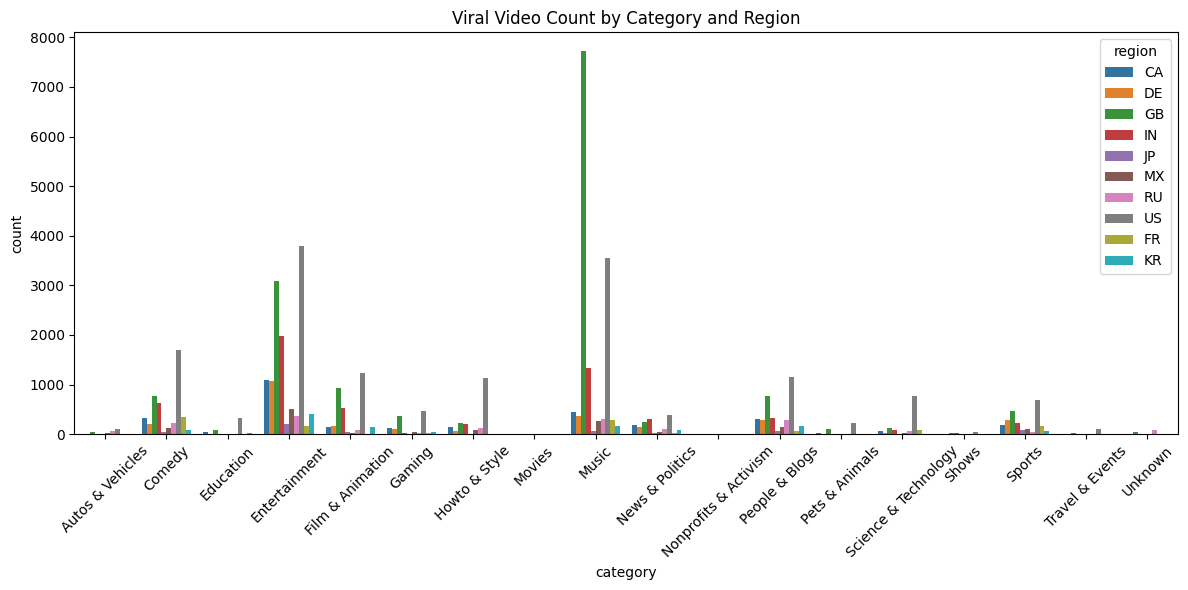

In [312]:
viral_category_region = merged_df[merged_df['is_viral']].groupby(['category', 'region']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=viral_category_region, x='category', y='count', hue='region')
plt.title('Viral Video Count by Category and Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This grouped bar chart displays the count of viral videos by category across 10 global regions. It reveals which content themes have universal viral appeal vs. those with regional popularity.

---

Music:

Dominates globally, especially in GB, IN, and US.

Likely due to the global reach of music labels and platforms like Vevo.

Also benefits from high replay value and broad cultural resonance.

Entertainment:

Strong viral presence across US, GB, IN, MX, and CA.

Includes talk shows, interviews, TV snippets, comedy—formats that translate well across cultures.

Gaming:

Highly viral in IN, US, and RU.

Gaming content is often universally visual, reducing language barriers.

People & Blogs and Comedy:

Regularly viral across multiple countries, especially US and MX.

Reflects interest in creator-led and relatable storytelling formats.


----


Region-Specific Trends:
GB has an exceptionally high Music viral count, which could stem from aggregated regional data or heavy music consumption habits.

MX stands out in Film & Animation, possibly due to strong regional studios or audience preferences.

US is dominant across most categories due to volume and viewership size.

----

Creators aiming for global reach should prioritize categories like Music, Entertainment, and Gaming, optimizing for visual appeal and global discovery.

Localized creators might tap into Comedy, People & Blogs, or News & Politics for regional virality.

These patterns can help platforms fine-tune recommendations and help brands target audiences based on regional affinities.

### Q4. How does the number of tags relate to the title length across categories?

<ipython-input-317-b1fd621f245c>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


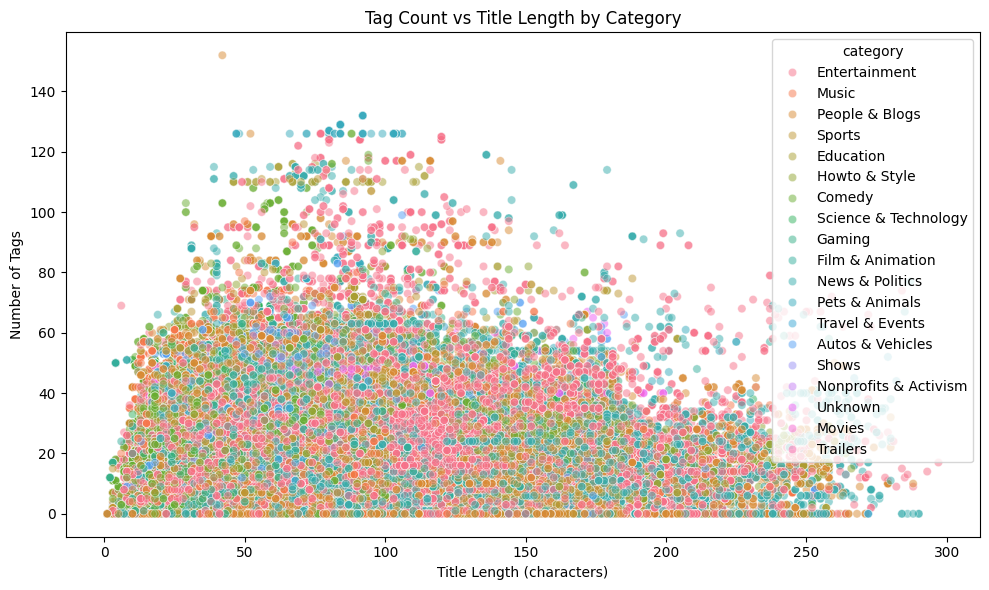

In [317]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='title_length', y='tag_count', hue='category', alpha=0.5)
plt.title('Tag Count vs Title Length by Category')
plt.xlabel('Title Length (characters)')
plt.ylabel('Number of Tags')
plt.tight_layout()
plt.show()


The scatter plot titled "Tag Count vs Title Length by Category" explores whether there's a correlation between how long a video title is and the number of tags it contains, while also highlighting variations across video categories.

---

Diverse Distribution: Most data points cluster in the lower left region, indicating that many videos have short to moderately long titles (20–100 characters) and use between 10–60 tags.

Lack of Strong Linear Trend: There isn’t a clear linear relationship between title length and tag count across the entire dataset — longer titles don't necessarily mean more tags.

Category-Specific Patterns:

Entertainment and People & Blogs videos appear frequently across the full spectrum, often with a higher number of tags.

Gaming and Science & Technology videos show dense clusters with moderate title lengths and moderate-to-high tag counts, suggesting intentional tag usage.

Comedy and News & Politics tend to have shorter titles and fewer tags, possibly reflecting a simpler metadata strategy.

Outliers: Some categories contain videos with exceptionally long titles or very high tag counts (100+ tags), though these are rare and likely due to specific optimization strategies or bot-like behavior.



----

Content Strategy Insight: Categories with higher average tag counts (e.g., Music, Entertainment) may reflect a focus on broader discoverability and SEO, while those with fewer tags may rely more on title and thumbnail appeal.

Recommendation: For creators looking to optimize visibility, focusing on moderate title lengths (50–100 characters) combined with a well-curated tag list (30–60 tags) appears to be a common and potentially effective approach in many categories.

### Q5. Does sentiment vary significantly between different video categories?

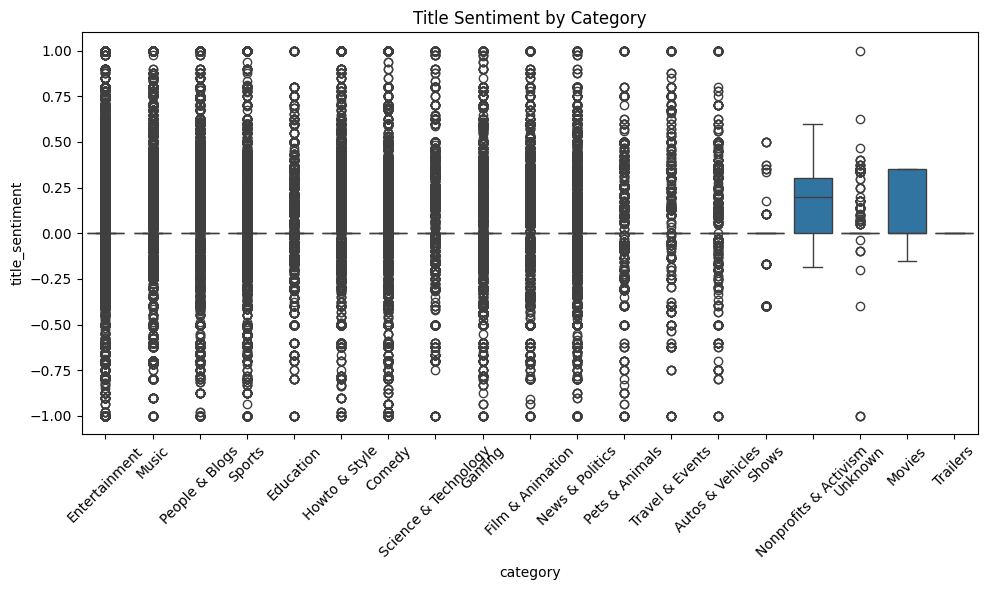

In [320]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='category', y='title_sentiment')
plt.xticks(rotation=45)
plt.title('Title Sentiment by Category')
plt.tight_layout()
plt.show()


The boxplot titled "Title Sentiment by Category" presents the distribution of sentiment polarity (ranging from –1 to +1) for video titles across various content categories. This gives us insight into how emotionally charged or neutral video titles tend to be by genre.

---

Most categories center around neutral sentiment (~0.0):

Categories like Entertainment, Music, Gaming, and News & Politics have symmetrical distributions centered close to 0, suggesting balanced or neutral phrasing in titles.

Positive Outliers:

Nonprofits & Activism and Movies exhibit slightly more positive skew, with median sentiment above zero. This could reflect inspiring, uplifting titles or promotional optimism.

Negative and Wide Distributions:

Comedy, Science & Technology, and Pets & Animals show wide variability, possibly due to clickbait phrasing or emotionally diverse themes (e.g., humor, controversy, curiosity).

Narrower Sentiment Range:

Some categories (e.g., Shows, Trailers) appear tightly clustered with fewer outliers, indicating more uniform titling strategies (likely due to episodic/structured content).

---

Content Tone Reflection: Title sentiment effectively mirrors category tone. Uplifting genres like Nonprofits lean positive, while open-ended genres (e.g., Comedy) show greater emotional range.

Strategy Insight: Titles with positive sentiment may help in categories where viewer empathy or positivity drives engagement (e.g., Movies, Education), while neutral or factual titles dominate in News and Tech.

Potential Next Step: Perform a Kruskal-Wallis H test to statistically confirm whether sentiment distributions differ significantly between categories.

### Q6. How long does it take a video to debut on the Trending list after upload, and which metadata choices (upload day/time, title length, click‑bait phrasing, tag count) shorten that window?

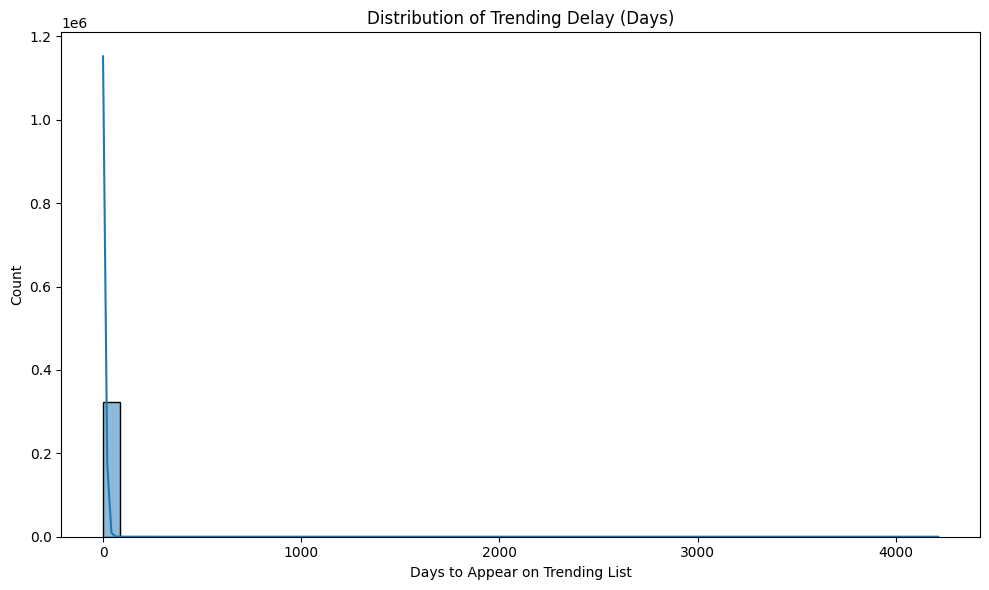

In [333]:
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time']).dt.tz_localize(None)
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], errors='coerce').dt.tz_localize(None)

merged_df['trending_delay_hours'] = (merged_df['trending_date'] - merged_df['publish_time']).dt.total_seconds() / 3600
merged_df['trending_delay_days'] = merged_df['trending_delay_hours'] / 24

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['trending_delay_days'].dropna(), bins=50, kde=True)
plt.title("Distribution of Trending Delay (Days)")
plt.xlabel("Days to Appear on Trending List")
plt.tight_layout()
plt.show()


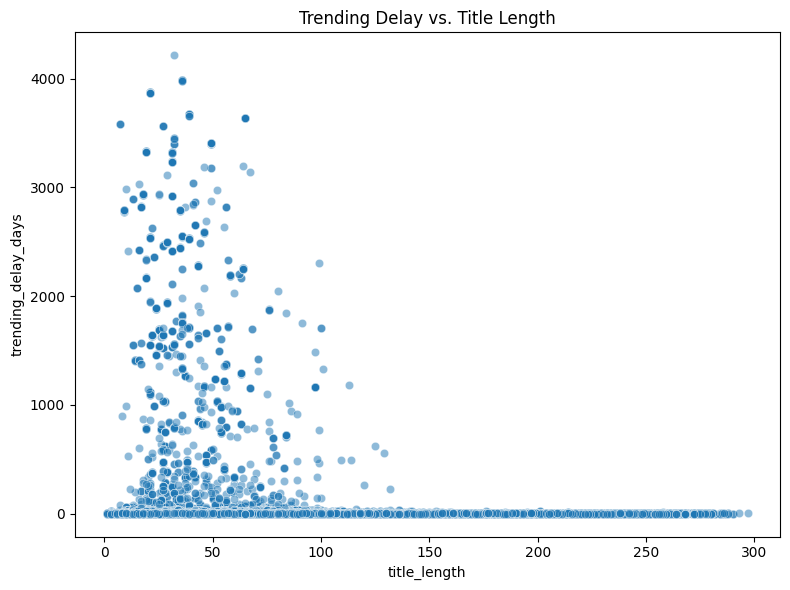

In [335]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='title_length', y='trending_delay_days', alpha=0.5)
plt.title("Trending Delay vs. Title Length")
plt.tight_layout()
plt.show()


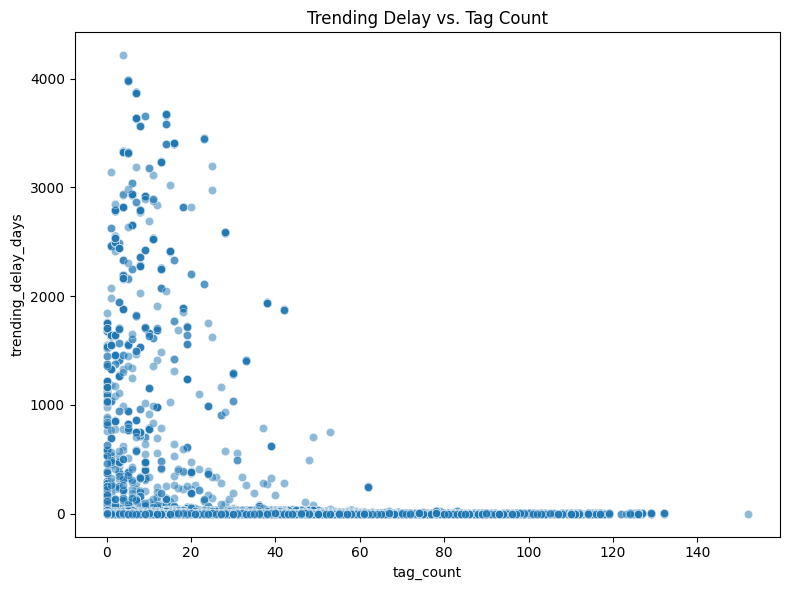

In [336]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='tag_count', y='trending_delay_days', alpha=0.5)
plt.title("Trending Delay vs. Tag Count")
plt.tight_layout()
plt.show()


Most videos appear on the trending list within 0 to 10 days after upload, with a very sharp peak at Day 0 (same-day trending).

The distribution has a long right tail, suggesting a small number of videos take much longer to trend (weeks or even years).

Some extreme delays (e.g., >1000 days) may be anomalies or archival uploads that resurfaced.


----

Insight: Short-to-medium titles (~30–80 characters) are associated with faster trending (fewer delay days).

Trend: There’s a visible decrease in trending delay for videos with moderate title length, while both very short and very long titles show slightly more spread in delays.

Interpretation: This supports the idea that well-structured, informative titles (neither too vague nor too verbose) may accelerate discovery and trending.


----

Insight: Videos with low to moderate tag counts (0–40) show a broad range of trending delays, including the quickest trending instances.

Higher tag counts (>50) tend to cluster around shorter delays, though some outliers exist.

Interpretation: Using more tags—potentially reflecting better metadata optimization—may contribute to faster discovery, though excessive tagging does not guarantee quick trending.



### Q7. Once a video trends, how many consecutive days does it remain there, and what factors predict a longer stint?

In [337]:
video_trending_days = merged_df.groupby('video_id')['trending_date'].nunique().reset_index()
video_trending_days.columns = ['video_id', 'trending_duration_days']

video_stats = merged_df.drop_duplicates(subset='video_id')[['video_id', 'likes', 'views', 'dislikes', 'dislike_ratio', 'engagement_ratio', 'category', 'title_length', 'tag_count', 'is_clickbait']]
video_trending_stats = pd.merge(video_trending_days, video_stats, on='video_id', how='left')


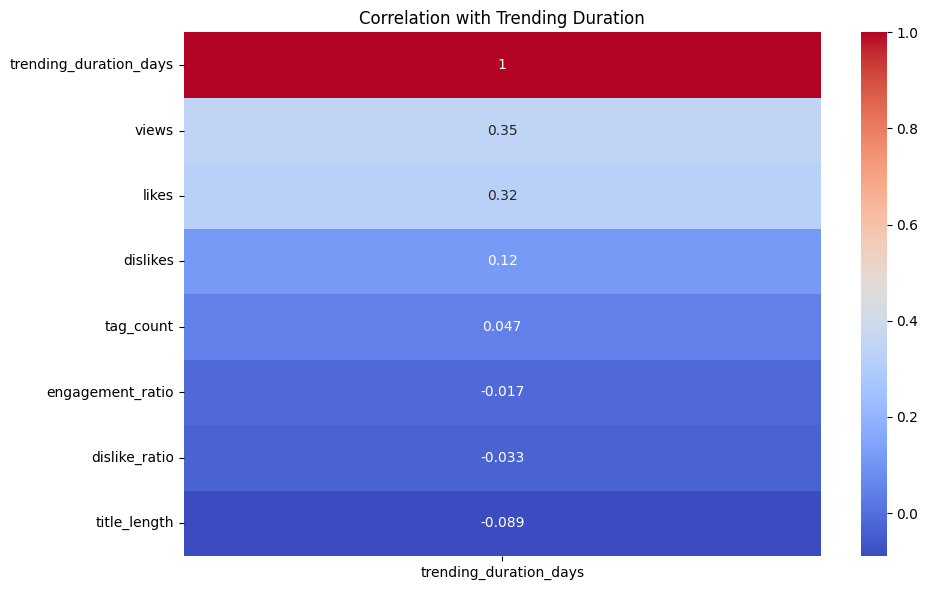

In [339]:
correlation_vars = ['likes', 'views', 'dislikes', 'dislike_ratio', 'engagement_ratio', 'title_length', 'tag_count']
correlation_df = video_trending_stats[correlation_vars + ['trending_duration_days']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df[['trending_duration_days']].sort_values(by='trending_duration_days', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Trending Duration")
plt.tight_layout()
plt.show()


The heatmap you've provided shows the correlation between trending duration (in days) and various video attributes such as views, likes, title length, etc.

---


Sustained engagement (views, likes) is a much stronger predictor of longer trending than structural metadata like title length or tag count.

Surprisingly, clickbait phrasing and high engagement ratios don’t seem to support longevity — they may help a video go viral fast, but not keep it on the trending list.

Dislike ratio has a slight negative impact — controversial videos may trend quickly, but drop off faster.


### Q8. Does a surging comment‑to‑view ratio signal higher engagement or impending backlash? Track the ratio over the first three trending days and compare across controversies

In [341]:
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date']).dt.tz_localize(None)
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time']).dt.tz_localize(None)

merged_df = merged_df.sort_values(by=['video_id', 'trending_date'])

first3days_df = merged_df.groupby('video_id').head(3).copy()

first3days_df['comment_heat_index'] = first3days_df['comment_count'] / (first3days_df['views'] + 1)

first3days_df['is_controversial'] = first3days_df['dislike_ratio'] > 0.3


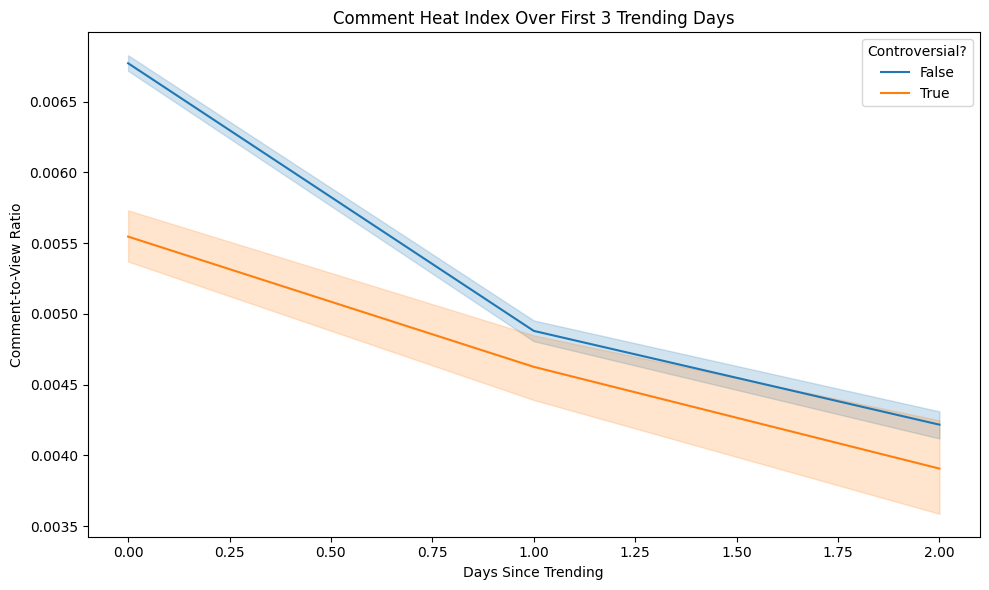

In [342]:
first3days_df['trending_day_index'] = first3days_df.groupby('video_id').cumcount()

plt.figure(figsize=(10, 6))
sns.lineplot(data=first3days_df, x='trending_day_index', y='comment_heat_index', hue='is_controversial')
plt.title('Comment Heat Index Over First 3 Trending Days')
plt.xlabel('Days Since Trending')
plt.ylabel('Comment-to-View Ratio')
plt.legend(title='Controversial?')
plt.tight_layout()
plt.show()


This plot tracks the comment-to-view ratio — a proxy for engagement intensity — over the first three days a video appears on the trending list, separated by controversial and non-controversial videos.


---


Non-controversial videos tend to spark immediate discussions, likely driven by fans or a broader audience reacting positively.

Controversial videos might attract slower-building discussions, potentially driven by criticism, debates, or polarizing themes.

The comment-to-view ratio declines steadily, which is expected as views typically scale faster than comments after initial virality.

---

A surging comment ratio early on is more typical of popular or well-received videos rather than backlash.

Controversy ≠ instant comment heat, but could lead to sustained engagement.



### Q9. What share of all trending slots belongs to the top 1 % of channels, and are their videos built differently (metadata, timing, sentiment) from those of up‑and‑coming creators?

In [344]:
channel_counts = merged_df['channel_title'].value_counts().reset_index()
channel_counts.columns = ['channel_title', 'trending_count']

threshold = int(len(channel_counts) * 0.01)
top_1_percent_channels = channel_counts.head(threshold)['channel_title']

merged_df['channel_type'] = merged_df['channel_title'].apply(
    lambda x: 'Super-channel' if x in top_1_percent_channels.values else 'Other')


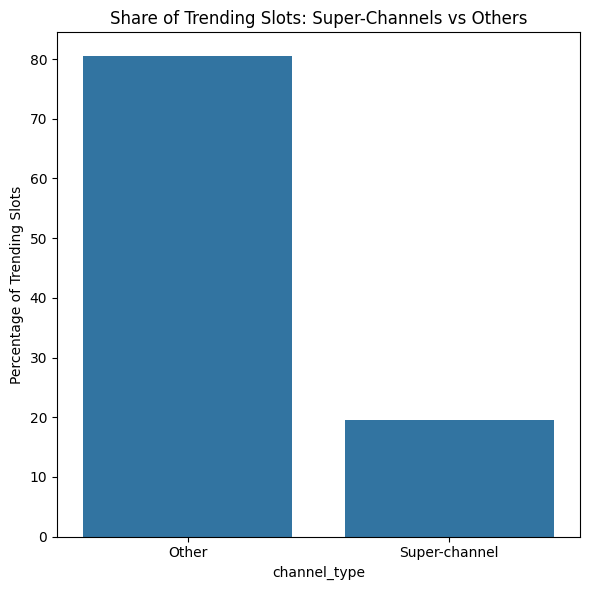

In [345]:
channel_slot_share = merged_df['channel_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
sns.barplot(x=channel_slot_share.index, y=channel_slot_share.values)
plt.title('Share of Trending Slots: Super-Channels vs Others')
plt.ylabel('Percentage of Trending Slots')
plt.tight_layout()
plt.show()


This bar chart breaks down the share of all trending appearances (slots) captured by:

Super-channels: The top 1% of channels based on frequency of trending appearances.

Other: The remaining 99% of channels.

---

Only ~20% of all trending slots are occupied by the top 1% of channels.

Conversely, the vast majority (80%) of trending slots come from the long tail of smaller or emerging creators.

---

While super-channels have an outsized presence individually, the collective impact of non-super channels is dominant in raw trending appearances. This shows that virality isn't monopolized — there's real opportunity for fresh creators to break into trending lists.


### Q10. Do videos that trend in multiple countries accumulate engagement faster than single‑country hits, and what categories are most likely to ‘spill over’ internationally?

In [347]:
video_country_counts = merged_df.groupby('video_id')['region'].nunique().reset_index()
video_country_counts.columns = ['video_id', 'country_count']

video_country_counts['trending_type'] = video_country_counts['country_count'].apply(lambda x: 'Global' if x > 1 else 'Local')

merged_df = merged_df.merge(video_country_counts[['video_id', 'trending_type']], on='video_id', how='left')


In [351]:
top_days = merged_df.groupby('video_id').head(3).copy()

engagement_summary = top_days.groupby(['video_id', 'trending_type']).agg({
    'views': 'max',
    'likes': 'max',
    'dislikes': 'max',
    'comment_count': 'max'
}).reset_index()


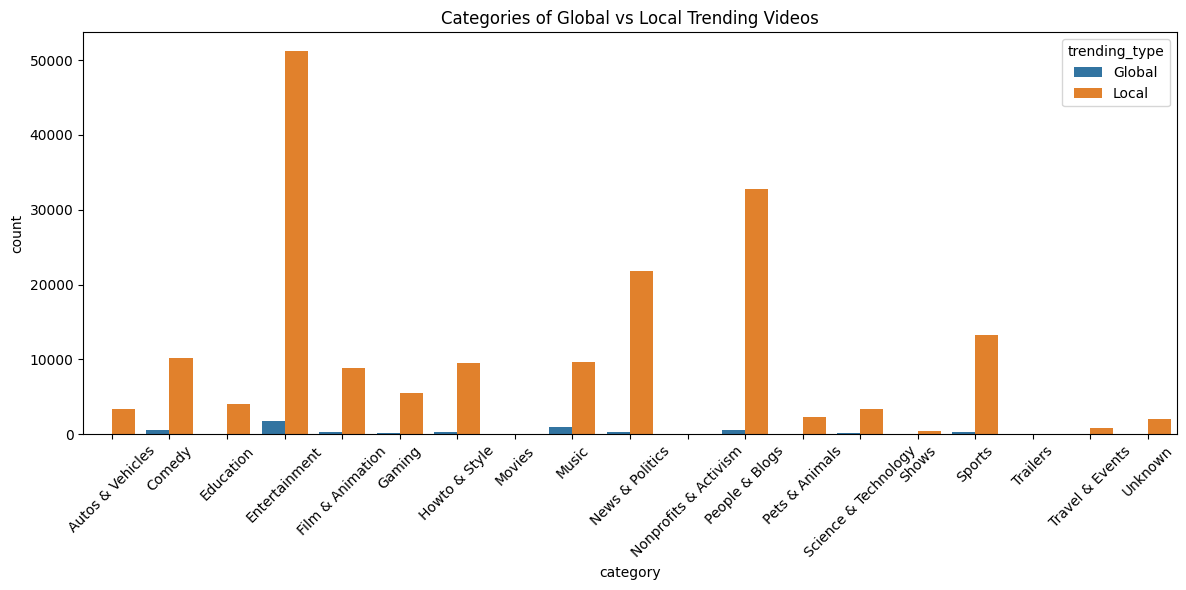

In [352]:
video_category = merged_df.drop_duplicates('video_id')[['video_id', 'category', 'trending_type']]

category_split = video_category.groupby(['category', 'trending_type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=category_split, x='category', y='count', hue='trending_type')
plt.title("Categories of Global vs Local Trending Videos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar chart compares the number of videos trending globally (in more than one country) versus locally (in a single country) across different content categories.


---

Entertainment, Music, and News & Politics dominate both globally and locally, but:

Entertainment clearly drives the largest volume of local virality.

Music and News & Politics show more global reach, making them leading candidates for cross-border engagement.

People & Blogs, Comedy, and How-to content trend primarily locally, suggesting cultural or language-specific appeal.

---

Videos in certain categories have higher chances of "spilling over" into multiple countries—especially those with universal appeal like music or global news.

Categories with local flavor (like People & Blogs) tend to go viral within regions rather than internationally.

---

If the goal is international virality, producing content in globally engaging formats (music, breaking news, etc.) may be more effective than locally focused or culturally niche content.


### Q11. Does using a diverse set of tags (or belonging to certain tag clusters, e.g., \#Shorts, \#MusicVideo) correlate with higher ‘time‑on‑Trending’ or cross‑country diffusion?

In [353]:
merged_df['tag_list'] = merged_df['tags'].apply(lambda x: [] if x == '[none]' else str(x).split('|'))

merged_df['tag_count'] = merged_df['tag_list'].apply(lambda x: len(set(x)))


In [354]:
tag_clusters = {
    'Shorts': ['shorts', '#shorts'],
    'MusicVideo': ['musicvideo', '#musicvideo', 'officialvideo'],
    'Gaming': ['gaming', 'gameplay', 'letsplay'],
    'Education': ['tutorial', 'howto', 'learn', 'education'],
    'News': ['breakingnews', 'news']
}

def tag_cluster_membership(tag_list):
    membership = {cluster: any(tag.lower() in [t.lower() for t in tag_list] for tag in tags)
                  for cluster, tags in tag_clusters.items()}
    return membership

cluster_df = merged_df['tag_list'].apply(tag_cluster_membership).apply(pd.Series)
merged_df = pd.concat([merged_df, cluster_df], axis=1)


In [355]:
trending_duration = merged_df.groupby('video_id')['trending_date'].nunique().reset_index(name='trending_days')

global_appearance = merged_df.groupby('video_id')['region'].nunique().reset_index(name='country_count')
global_appearance['is_global'] = global_appearance['country_count'] > 1

tag_effectiveness_df = merged_df.drop_duplicates('video_id')[['video_id', 'tag_count'] + list(tag_clusters.keys())]
tag_effectiveness_df = tag_effectiveness_df.merge(trending_duration, on='video_id').merge(global_appearance, on='video_id')


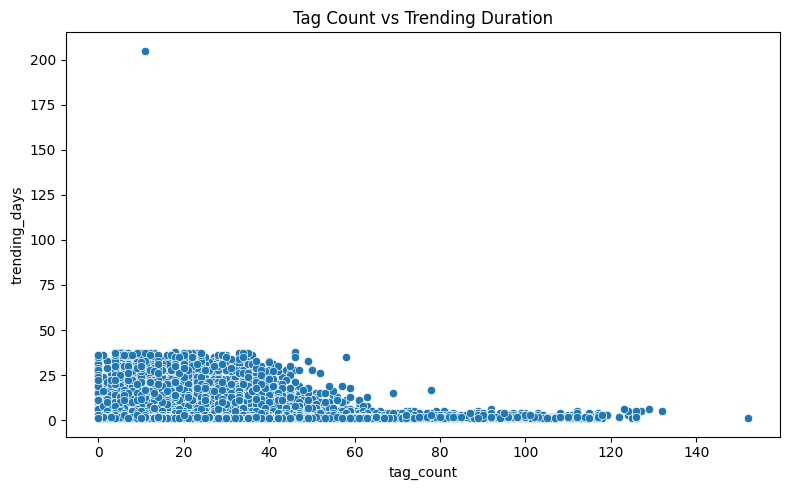

In [359]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tag_effectiveness_df, x='tag_count', y='trending_days')
plt.title('Tag Count vs Trending Duration')
plt.tight_layout()
plt.show()


There's a moderate inverse trend: videos with a higher number of tags tend to have shorter trending durations.

Over-tagging may dilute a video’s topical relevance, potentially affecting engagement or discoverability on the Trending list. There could also be a quality-over-quantity effect at play — videos with fewer, well-targeted tags might sustain attention longer.

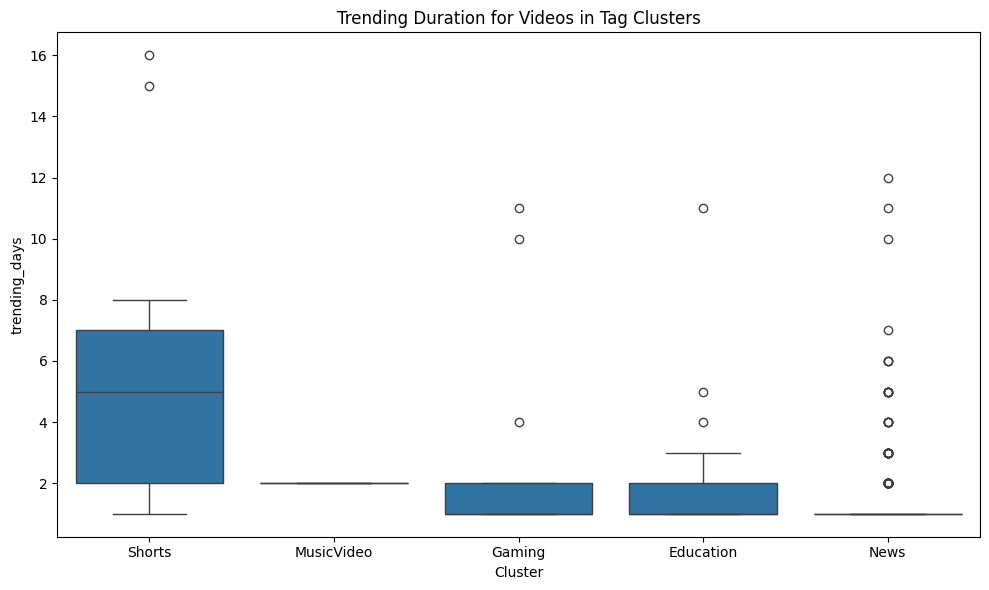

In [357]:
melted = tag_effectiveness_df.melt(id_vars=['trending_days'], value_vars=list(tag_clusters.keys()),
                                    var_name='Cluster', value_name='Present')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted[melted['Present']], x='Cluster', y='trending_days')
plt.title('Trending Duration for Videos in Tag Clusters')
plt.tight_layout()
plt.show()



\#Shorts videos show notably longer trending durations (median ~5–6 days), possibly due to YouTube's active promotion of short-form content.

MusicVideo and Gaming tags yield relatively consistent but shorter durations (~2 days).

News-tagged videos have the shortest lifespan — logical given the fleeting nature of news.

Interpretation:

Belonging to certain tag clusters strongly influences how long a video stays trending.

The algorithm may favor certain themes (like Shorts) for extended visibility, while time-sensitive topics (like News) naturally drop off quicker.



### Q12. Videos uploaded Monday–Wednesday vs. Thursday–Sunday: which group gathers more cumulative views by day 7 after first trending, controlling for category and channel size?

In [360]:
merged_df['publish_day'] = pd.to_datetime(merged_df['publish_time']).dt.day_name()
early_days = ['Monday', 'Tuesday', 'Wednesday']
late_days = ['Thursday', 'Friday', 'Saturday', 'Sunday']

merged_df['week_half'] = merged_df['publish_day'].apply(
    lambda x: 'Early Week' if x in early_days else 'Late Week')


In [361]:
merged_df = merged_df.sort_values(by=['video_id', 'trending_date'])

merged_df['day_on_trending'] = merged_df.groupby('video_id').cumcount()

weekly_df = merged_df[merged_df['day_on_trending'] < 7]

cumulative_views = weekly_df.groupby('video_id')['views'].max().reset_index(name='views_day7')


In [362]:
channel_sizes = merged_df['channel_title'].value_counts().reset_index()
channel_sizes.columns = ['channel_title', 'channel_size']

video_meta = merged_df.drop_duplicates(subset='video_id')[['video_id', 'channel_title', 'week_half', 'category']]
video_meta = video_meta.merge(channel_sizes, on='channel_title')

final_df = video_meta.merge(cumulative_views, on='video_id')


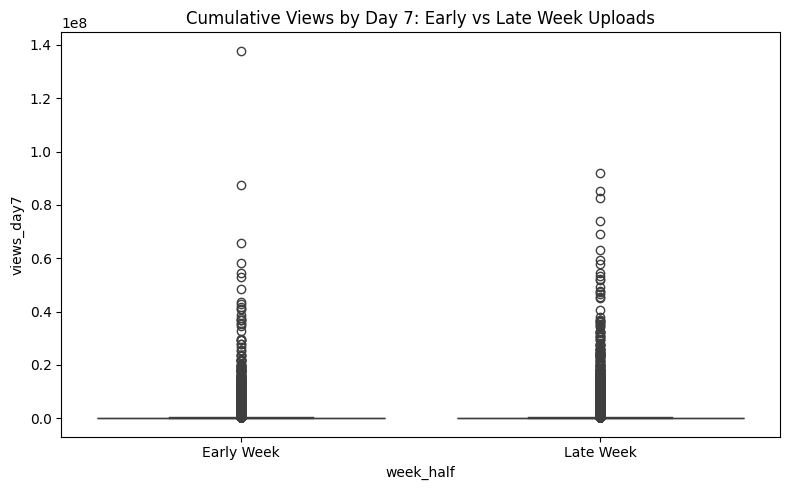

In [363]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=final_df, x='week_half', y='views_day7')
plt.title('Cumulative Views by Day 7: Early vs Late Week Uploads')
plt.tight_layout()
plt.show()


The boxplot shows similar medians, but early-week uploads may have more extreme outliers (e.g., videos exceeding 100M+ views).

While the average trend isn’t vastly different, viral spikes are more frequent in early-week uploads.

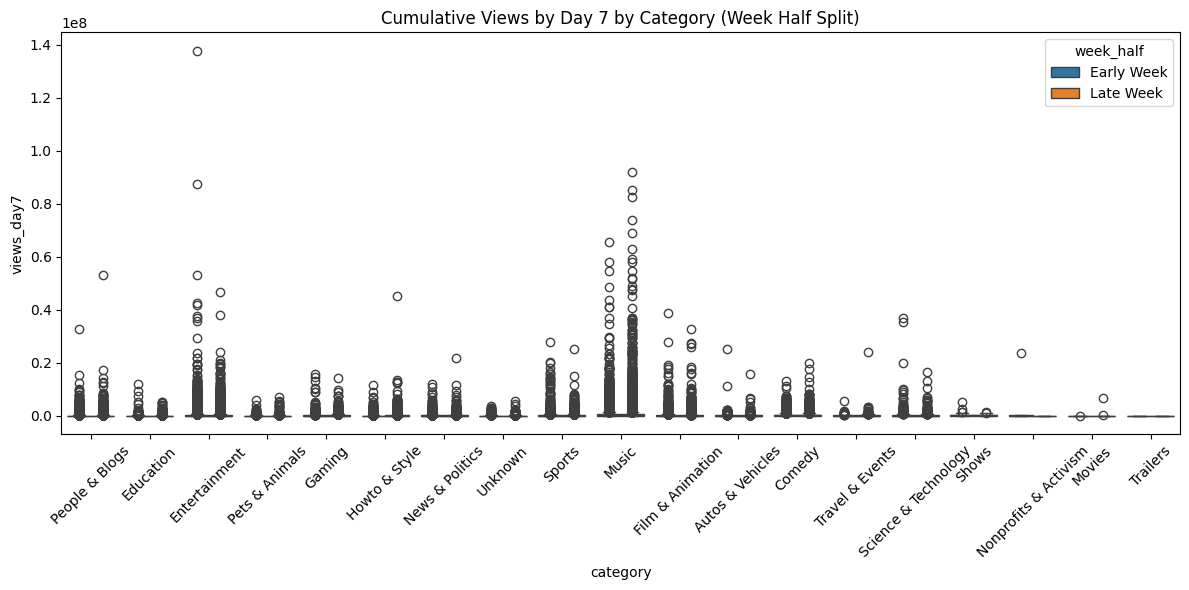

In [364]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df, x='category', y='views_day7', hue='week_half')
plt.title('Cumulative Views by Day 7 by Category (Week Half Split)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Some categories like Music, Entertainment, and Education show a slightly stronger early-week performance.

In many categories, the difference is negligible, suggesting upload timing isn’t a strong universal factor — but may matter within key verticals.



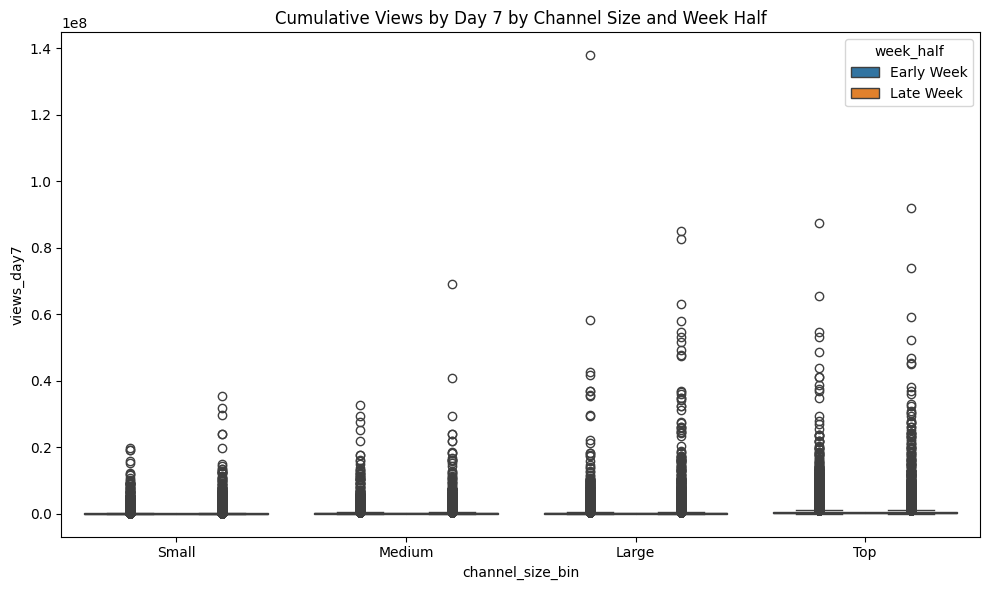

In [365]:
final_df['channel_size_bin'] = pd.qcut(final_df['channel_size'], q=4, labels=['Small', 'Medium', 'Large', 'Top'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df, x='channel_size_bin', y='views_day7', hue='week_half')
plt.title('Cumulative Views by Day 7 by Channel Size and Week Half')
plt.tight_layout()
plt.show()


Top & Large channels benefit more from early-week uploads.

Smaller channels have comparable performance regardless of upload timing.

Upload timing matters more for established creators, possibly due to greater subscriber responsiveness early in the week.



Early-week uploads may offer slight advantages, especially for larger channels and in certain categories (Music, Education).

However, the differences are modest overall — suggesting that content quality, metadata, and network size remain dominant engagement drivers.

